# Exploratory Analysis

Having cleaned our raw data in the previous notebook, we now have the appropriate data that we can work with.

Our main goal is to predict the `Severity` of the accident based on the different variables that we are given. Thus, we now want to find the relationship of the different variables with the `Severity` of the accident

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import datetime as dt
sb.set()

In [2]:
cal_accident_df = pd.read_csv('california_accident_data.csv')

We then look at the summary of the data given

In [3]:
cal_accident_df.head()

,Unnamed: 0,Severity,Start_Time,Start_Lat,Start_Lng,Street,City,County,Zipcode,Humidity(%),...,Nautical_Twilight,Astronomical_Twilight,Distance,Visibility,Wind_Speed,Temperature,Wind_Chill,Precipitation,Pressure,Road_Type
0,284839,2,2021-03-02 04:23:00,32.712332,-117.101325,I-805 N,San Diego,San Diego,92102,44.0,...,Night,Night,0.328,16.0,8.00,8.333333,7.222222,0.0,760.476,Expressway
1,274958,2,2020-04-06 08:18:00,33.872132,-117.686929,CA-91 W,Anaheim,Orange,92808,100.0,...,Day,Day,0.000,16.0,0.00,12.222222,12.222222,0.0,744.728,Expressway
2,10908,2,2020-02-09 12:38:00,33.987739,-118.398953,Jefferson Blvd,Culver City,Los Angeles,90230,72.0,...,Day,Day,0.000,16.0,12.80,13.888889,13.888889,0.0,752.094,Street
3,407622,2,2018-07-11 23:57:23,37.896477,-121.678062,Sellers Ave,Brentwood,Contra Costa,94513,61.0,...,Night,Night,0.000,16.0,14.72,21.111111,NaN,NaN,757.936,Street
4,195224,3,2018-08-04 23:23:32,33.371662,-117.555237,San Diego Fwy S,San Clemente,San Diego,92672,84.0,...,Night,Night,0.000,16.0,NaN,19.388889,NaN,NaN,764.286,Street


In [4]:
print('shape:', cal_accident_df.shape)
print(cal_accident_df.info())

shape: (10000, 37)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 37 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             10000 non-null  int64  
 1   Severity               10000 non-null  int64  
 2   Start_Time             10000 non-null  object 
 3   Start_Lat              10000 non-null  float64
 4   Start_Lng              10000 non-null  float64
 5   Street                 9989 non-null   object 
 6   City                   10000 non-null  object 
 7   County                 10000 non-null  object 
 8   Zipcode                9996 non-null   object 
 9   Humidity(%)            9743 non-null   float64
 10  Wind_Direction         9750 non-null   object 
 11  Weather_Condition      9788 non-null   object 
 12  Amenity                10000 non-null  bool   
 13  Bump                   10000 non-null  bool   
 14  Crossing               10000 non-nul

In [5]:
cal_accident_df.describe()

,Unnamed: 0,Severity,Start_Lat,Start_Lng,Humidity(%),Distance,Visibility,Wind_Speed,Temperature,Wind_Chill,Precipitation,Pressure
count,10000.000000,10000.000000,10000.000000,10000.000000,9743.000000,10000.000000,9782.000000,9101.000000,9759.000000,7072.000000,6754.000000,9800.000000
mean,250207.786300,2.177400,35.591959,-119.454170,58.707688,0.767818,14.534628,10.391210,17.613616,16.944248,0.102931,752.618121
std,144164.561081,0.419699,2.078974,1.916118,24.147840,2.206194,3.869838,8.308007,7.477572,7.997445,0.627505,19.752499
min,2.000000,1.000000,32.588284,-124.209382,3.000000,0.000000,0.000000,0.000000,-21.000000,-12.777778,0.000000,579.120000
25%,126138.750000,2.000000,33.971848,-121.473650,40.000000,0.000000,16.000000,4.800000,12.777778,11.666667,0.000000,752.602000
50%,250234.500000,2.000000,34.201188,-118.410847,61.000000,0.036800,16.000000,9.600000,17.222222,16.666667,0.000000,758.444000
75%,377000.500000,2.000000,37.690032,-117.919611,78.000000,0.689600,16.000000,14.400000,22.222222,22.222222,0.000000,761.746000
max,499975.000000,4.000000,41.998245,-114.377093,100.000000,78.953600,128.000000,92.800000,43.333333,43.333333,13.208000,774.700000


## Analysis: Severity

`Severity`: A scale from 1-4 on how severe the accident is, with 1 being the least severe and 4 being the most

Now, let's do some EDA on `Severity`

In [6]:
cal_accident_df['Severity'].describe()

count    10000.000000
mean         2.177400
std          0.419699
min          1.000000
25%          2.000000
50%          2.000000
75%          2.000000
max          4.000000
Name: Severity, dtype: float64

number of Severity levels: 4
          count      %
Severity              
2          8206  82.06
3          1643  16.43
4            94   0.94
1            57   0.57


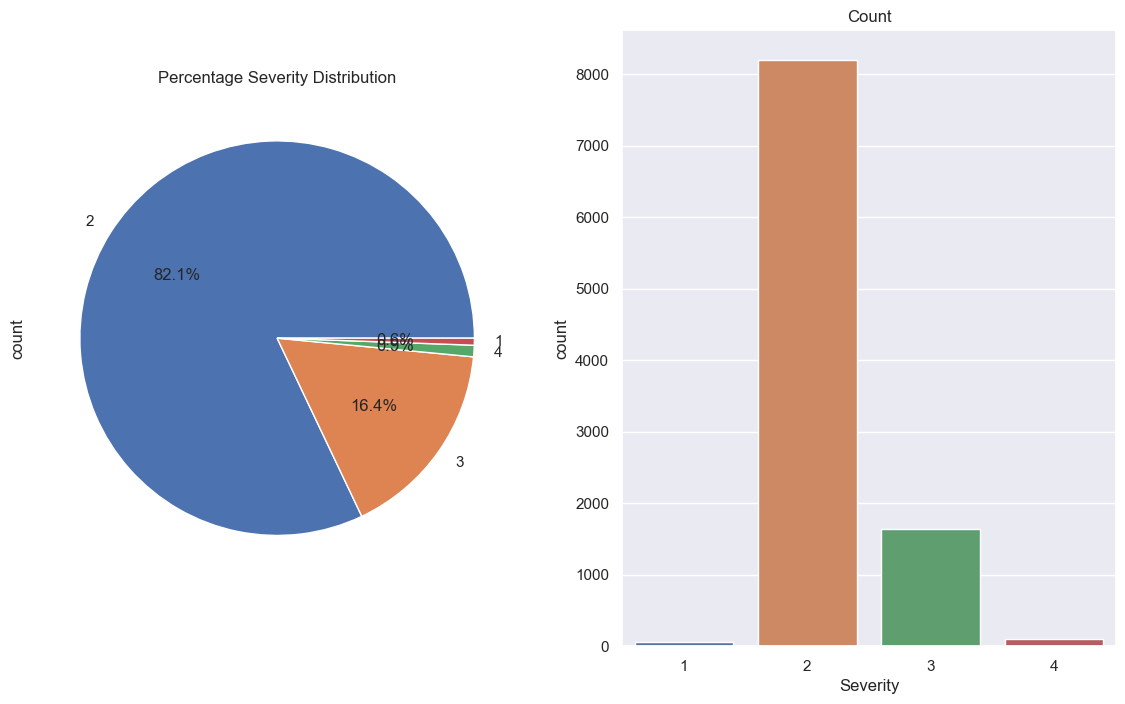

In [7]:
# print count and ratio of total count of the different severity levels
print('number of Severity levels:', len(cal_accident_df['Severity'].unique()))
count = cal_accident_df['Severity'].value_counts()
ratio = round(cal_accident_df['Severity'].value_counts(normalize=True) * 100, 2)
tmp = pd.concat([count, ratio], axis=1, keys=['count', '%'])
print(tmp)

# plot bar and pie chart
f, axes = plt.subplots(1, 2, figsize=(14, 8))

axes[0].set_title('Percentage Severity Distribution')
cal_accident_df['Severity'].value_counts().plot.pie(autopct = '%1.1f%%', ax = axes[0])

axes[1].set_title('Count')
sb.countplot(x = 'Severity', data = cal_accident_df, ax = axes[1])

plt.show()

From the above, we can see that the average `Severity` level is 2, with the mean, median and mode of `Severity` being 2. We also note that the `Severity` level of 1 & 4 are minimal, with their percentage distribution being less than 1%. This information will be helpful for us later on in our EDA

## Null Values

We want to see the number of null values that each variable has

In [8]:
count = cal_accident_df.isna().sum()
ratio = round(cal_accident_df.isna().mean() * 100, 2)
null_values = pd.concat([count, ratio], axis = 1, keys = ['count', '%'])
print(null_values.sort_values(by='%', ascending=False))

                       count      %
Precipitation           3246  32.46
Wind_Chill              2928  29.28
Wind_Speed               899   8.99
Humidity(%)              257   2.57
Wind_Direction           250   2.50
Temperature              241   2.41
Visibility               218   2.18
Weather_Condition        212   2.12
Pressure                 200   2.00
Road_Type                190   1.90
Street                    11   0.11
Astronomical_Twilight      5   0.05
Nautical_Twilight          5   0.05
Civil_Twilight             5   0.05
Sunrise_Sunset             5   0.05
Zipcode                    4   0.04
Stop                       0   0.00
Distance                   0   0.00
Turning_Loop               0   0.00
Traffic_Signal             0   0.00
Traffic_Calming            0   0.00
Unnamed: 0                 0   0.00
Station                    0   0.00
Roundabout                 0   0.00
Severity                   0   0.00
No_Exit                    0   0.00
Junction                   0

## Analysis: Date & Time

The variable `Start_Time` provide us with the date and time of the accident. Let us first convert the column type to python `datetime` object. This will make it easier for us when comparing and grouping them.

In [9]:
# convert Start_Time to datetime object
cal_accident_df['Start_Time'] = pd.to_datetime(cal_accident_df['Start_Time'])
print(cal_accident_df['Start_Time'].dtype)

datetime64[ns]


### Month

Let us group them by their month and severity level

Severity     1    2    3   4
Start_Time                  
1            0  816  136   5
2            0  771   97   6
3            6  679  144  10
4            9  627  157   7
5           19  587  147   7
6            6  528  155   9
7            7  444  159  14
8            7  550  119   9
9            3  703  141   6
10           0  705  127   3
11           0  812  144   6
12           0  984  117  12


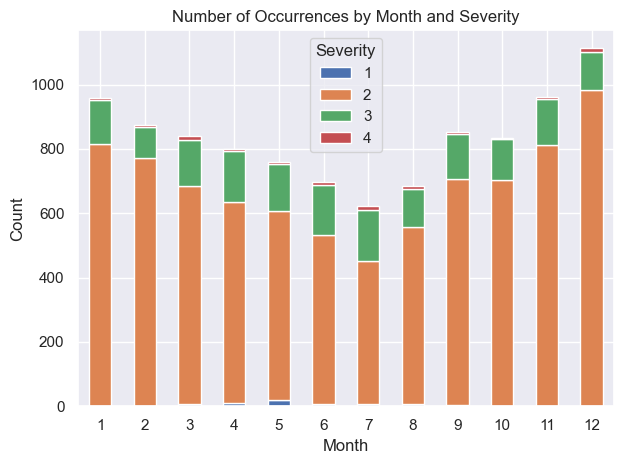

In [10]:
# Group DataFrame by month and severity, and count occurrences
month_counts = cal_accident_df.groupby([cal_accident_df['Start_Time'].dt.month, 'Severity']).size().unstack(fill_value=0)
print(month_counts)

# Plot a stacked bar graph
month_counts.plot(kind='bar', stacked=True)
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Number of Occurrences by Month and Severity')
plt.xticks(rotation=0)  # Ensure x-axis labels are not rotated
plt.legend(title='Severity')
plt.tight_layout()
plt.show()

               1      %    2      %    3     %   4      %
Start_Time                                               
1            0.0   0.00  816   9.94  136  8.28   5   5.32
2            0.0   0.00  771   9.40   97  5.90   6   6.38
3            6.0  10.53  679   8.27  144  8.76  10  10.64
4            9.0  15.79  627   7.64  157  9.56   7   7.45
5           19.0  33.33  587   7.15  147  8.95   7   7.45
6            6.0  10.53  528   6.43  155  9.43   9   9.57
7            7.0  12.28  444   5.41  159  9.68  14  14.89
8            7.0  12.28  550   6.70  119  7.24   9   9.57
9            3.0   5.26  703   8.57  141  8.58   6   6.38
10           0.0   0.00  705   8.59  127  7.73   3   3.19
11           0.0   0.00  812   9.90  144  8.76   6   6.38
12           0.0   0.00  984  11.99  117  7.12  12  12.77


<Axes: title={'center': 'Severity = 4'}, xlabel='Month'>

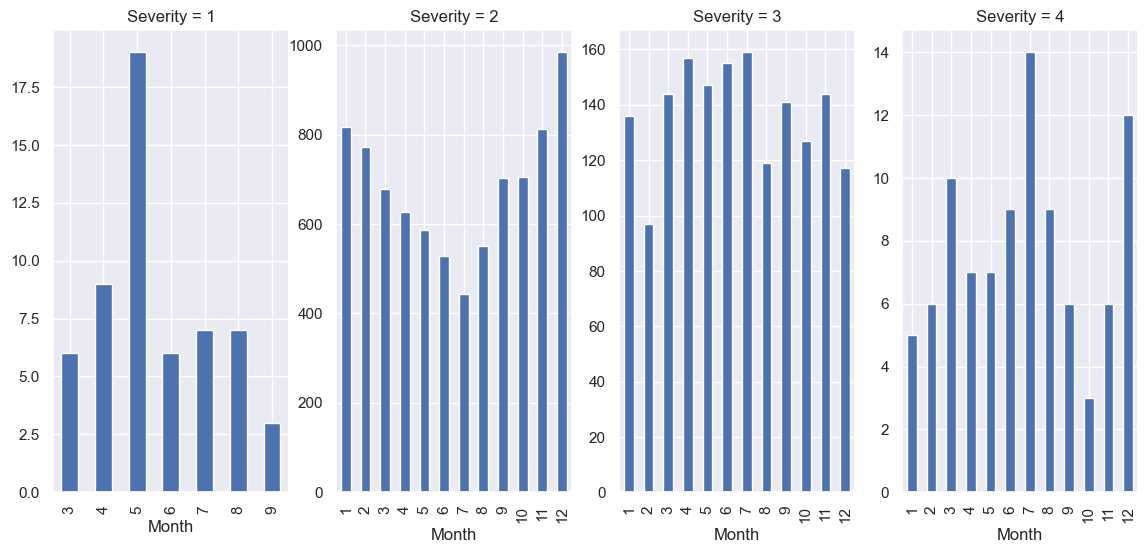

In [11]:
# group them by severity
acc_severity_1 = pd.DataFrame(cal_accident_df[cal_accident_df['Severity'] == 1])
acc_severity_2 = pd.DataFrame(cal_accident_df[cal_accident_df['Severity'] == 2])
acc_severity_3 = pd.DataFrame(cal_accident_df[cal_accident_df['Severity'] == 3])
acc_severity_4 = pd.DataFrame(cal_accident_df[cal_accident_df['Severity'] == 4])

month_counts_1 = acc_severity_1.groupby(acc_severity_1['Start_Time'].dt.month).size()
percentage_1 = round((month_counts_1 / month_counts_1.sum()) * 100, 2)
month_counts_2 = acc_severity_2.groupby(acc_severity_2['Start_Time'].dt.month).size()
percentage_2 = round((month_counts_2 / month_counts_2.sum()) * 100, 2)
month_counts_3 = acc_severity_3.groupby(acc_severity_3['Start_Time'].dt.month).size()
percentage_3 = round((month_counts_3 / month_counts_3.sum()) * 100, 2)
month_counts_4 = acc_severity_4.groupby(acc_severity_4['Start_Time'].dt.month).size()
percentage_4 = round((month_counts_4 / month_counts_4.sum()) * 100, 2)

tmp = pd.concat([month_counts_1, percentage_1,
                 month_counts_2, percentage_2,
                 month_counts_3, percentage_3,
                 month_counts_4, percentage_4],
                 axis=1, keys=['1', '%', '2', '%', '3', '%', '4', '%'])
tmp = tmp.fillna(0)
tmp = tmp.sort_index(ascending=True)
print(tmp)


# plot graph
f, axes = plt.subplots(1, 4, figsize= (14, 6))
month_counts_1.plot(kind='bar', title='Severity = 1', ax=axes[0], xlabel='Month')
month_counts_2.plot(kind='bar', title='Severity = 2', ax=axes[1], xlabel='Month')
month_counts_3.plot(kind='bar', title='Severity = 3', ax=axes[2], xlabel='Month')
month_counts_4.plot(kind='bar', title='Severity = 4', ax=axes[3], xlabel='Month')

### Conclusion

It seems that the number of accidents are most during the start and end of the year while it is at its least during the middle of the year. However, upon further inspection, this seems to be only true for `Severity=2`. 

Futher inspection of other factors may lead explain the differing trends

### Day

Let us group them by their day and severity level

Severity     1     2    3   4
Start_Time                   
Monday      11  1199  258  20
Tuesday      8  1275  259  13
Wednesday   11  1310  252  13
Thursday     6  1312  283  11
Friday       6  1469  274  21
Saturday     6   874  180   7
Sunday       9   767  137   9


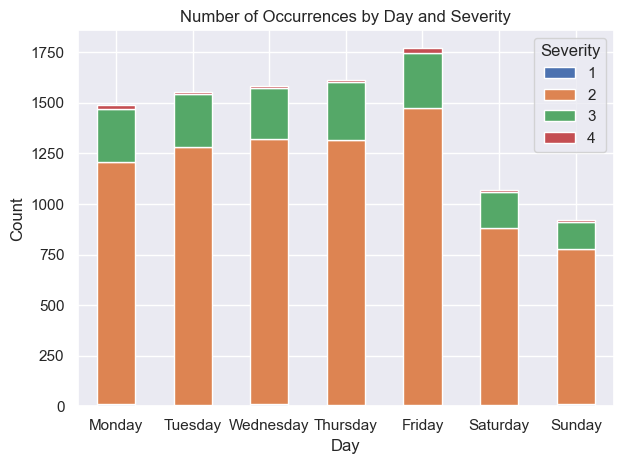

In [12]:
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Group DataFrame by month and severity, and count occurrences
day_counts = cal_accident_df.groupby([cal_accident_df['Start_Time'].dt.day_name(), 'Severity']).size().unstack(fill_value=0)
day_counts = day_counts.reindex(day_order)
print(day_counts)

# Plot a stacked bar graph
day_counts.plot(kind='bar', stacked=True)
plt.xlabel('Day')
plt.ylabel('Count')
plt.title('Number of Occurrences by Day and Severity')
plt.xticks(rotation=0)  # Ensure x-axis labels are not rotated
plt.legend(title='Severity')
plt.tight_layout()
plt.show()

             1      %     2      %    3      %   4      %
Start_Time                                               
Monday      11  19.30  1199  14.61  258  15.70  20  21.28
Tuesday      8  14.04  1275  15.54  259  15.76  13  13.83
Wednesday   11  19.30  1310  15.96  252  15.34  13  13.83
Thursday     6  10.53  1312  15.99  283  17.22  11  11.70
Friday       6  10.53  1469  17.90  274  16.68  21  22.34
Saturday     6  10.53   874  10.65  180  10.96   7   7.45
Sunday       9  15.79   767   9.35  137   8.34   9   9.57


<Axes: title={'center': 'Severity = 4'}, xlabel='Day'>

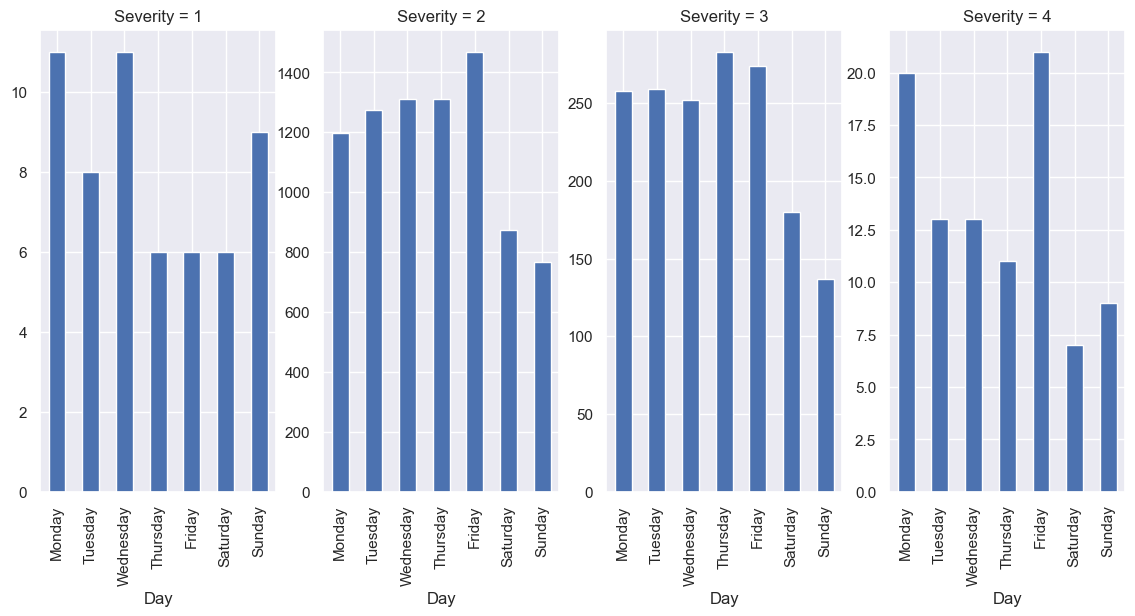

In [13]:
day_counts_1 = acc_severity_1.groupby(acc_severity_1['Start_Time'].dt.day_name()).size()
percentage_1 = round((day_counts_1 / day_counts_1.sum()) * 100, 2)
day_counts_2 = acc_severity_2.groupby(acc_severity_2['Start_Time'].dt.day_name()).size()
percentage_2 = round((day_counts_2 / day_counts_2.sum()) * 100, 2)
day_counts_3 = acc_severity_3.groupby(acc_severity_3['Start_Time'].dt.day_name()).size()
percentage_3 = round((day_counts_3 / day_counts_3.sum()) * 100, 2)
day_counts_4 = acc_severity_4.groupby(acc_severity_4['Start_Time'].dt.day_name()).size()
percentage_4 = round((day_counts_4 / day_counts_4.sum()) * 100, 2)

day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_counts_1 = day_counts_1.reindex(day_order)
day_counts_2 = day_counts_2.reindex(day_order)
day_counts_3 = day_counts_3.reindex(day_order)
day_counts_4 = day_counts_4.reindex(day_order)

tmp = pd.concat([day_counts_1, percentage_1,
                 day_counts_2, percentage_2,
                 day_counts_3, percentage_3,
                 day_counts_4, percentage_4],
                 axis=1, keys=['1', '%', '2', '%', '3', '%', '4', '%'])

# tmp = tmp.reindex(day_order)
print(tmp)


# plot graph
f, axes = plt.subplots(1, 4, figsize= (14, 6))
day_counts_1.plot(kind='bar', title='Severity = 1', ax=axes[0], xlabel='Day')
day_counts_2.plot(kind='bar', title='Severity = 2', ax=axes[1], xlabel='Day')
day_counts_3.plot(kind='bar', title='Severity = 3', ax=axes[2], xlabel='Day')
day_counts_4.plot(kind='bar', title='Severity = 4', ax=axes[3], xlabel='Day')

### Conclusion

It seems that all `Severity` levels follow the trend of higher number of accidents in the weekdays, with the most occuring on Friday, with a significant drop on the weekends. This is as suspected as most people are working on the weekdays, meaning that they need to commute work and with more people on the roads, more accidents tend to happen

### Hour

Let us group them by their hour and severity level

Severity    1    2    3   4
Start_Time                 
0           1  185   40   3
1           2  159   21   1
2           1  171   16   3
3           2  126   27   2
4           5  184   35   3
5           4  248   54   4
6           3  381   64   6
7           5  509  103   3
8           2  465  115   5
9           1  351   99   3
10          1  314   92   4
11          2  335   80   5
12          1  395   82   5
13          4  423   91   3
14          3  522   82   2
15          4  597  110  13
16          3  554  103   4
17          3  557   85   3
18          5  443   79   4
19          3  324   76   2
20          0  271   60   4
21          0  254   42   4
22          1  226   53   4
23          1  212   34   4


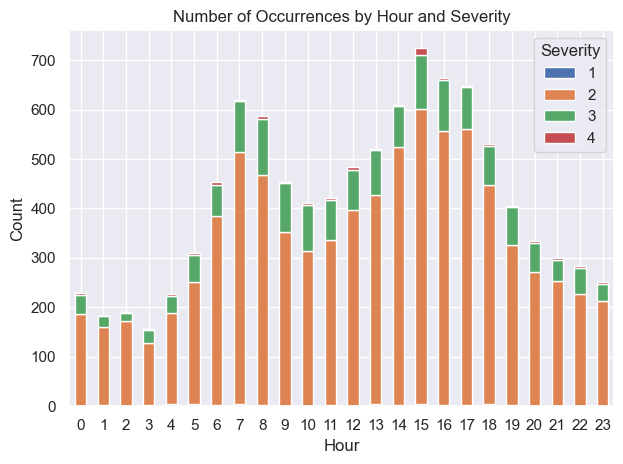

In [14]:
# Group DataFrame by hour and severity, and count occurrences
hour_counts = cal_accident_df.groupby([cal_accident_df['Start_Time'].dt.hour, 'Severity']).size().unstack(fill_value=0)
print(hour_counts)

# Plot a stacked bar graph
hour_counts.plot(kind='bar', stacked=True)
plt.xlabel('Hour')
plt.ylabel('Count')
plt.title('Number of Occurrences by Hour and Severity')
plt.xticks(rotation=0)  # Ensure x-axis labels are not rotated
plt.legend(title='Severity')
plt.tight_layout()
plt.show()

              1     %    2     %    3     %   4      %
Start_Time                                            
0           1.0  1.75  185  2.25   40  2.43   3   3.19
1           2.0  3.51  159  1.94   21  1.28   1   1.06
2           1.0  1.75  171  2.08   16  0.97   3   3.19
3           2.0  3.51  126  1.54   27  1.64   2   2.13
4           5.0  8.77  184  2.24   35  2.13   3   3.19
5           4.0  7.02  248  3.02   54  3.29   4   4.26
6           3.0  5.26  381  4.64   64  3.90   6   6.38
7           5.0  8.77  509  6.20  103  6.27   3   3.19
8           2.0  3.51  465  5.67  115  7.00   5   5.32
9           1.0  1.75  351  4.28   99  6.03   3   3.19
10          1.0  1.75  314  3.83   92  5.60   4   4.26
11          2.0  3.51  335  4.08   80  4.87   5   5.32
12          1.0  1.75  395  4.81   82  4.99   5   5.32
13          4.0  7.02  423  5.15   91  5.54   3   3.19
14          3.0  5.26  522  6.36   82  4.99   2   2.13
15          4.0  7.02  597  7.28  110  6.70  13  13.83
16        

<Axes: title={'center': 'Severity = 4'}, xlabel='Start_Time'>

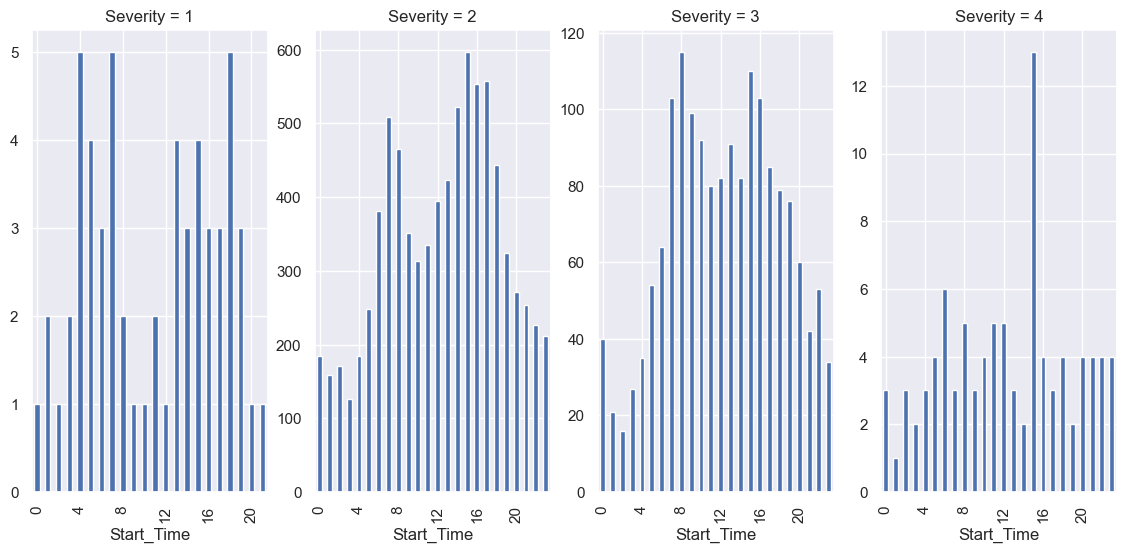

In [15]:
hour_counts_1 = acc_severity_1.groupby(acc_severity_1['Start_Time'].dt.hour).size()
percentage_1 = round((hour_counts_1 / hour_counts_1.sum()) * 100, 2)
hour_counts_2 = acc_severity_2.groupby(acc_severity_2['Start_Time'].dt.hour).size()
percentage_2 = round((hour_counts_2 / hour_counts_2.sum()) * 100, 2)
hour_counts_3 = acc_severity_3.groupby(acc_severity_3['Start_Time'].dt.hour).size()
percentage_3 = round((hour_counts_3 / hour_counts_3.sum()) * 100, 2)
hour_counts_4 = acc_severity_4.groupby(acc_severity_4['Start_Time'].dt.hour).size()
percentage_4 = round((hour_counts_4 / hour_counts_4.sum()) * 100, 2)

tmp = pd.concat([hour_counts_1, percentage_1,
                 hour_counts_2, percentage_2,
                 hour_counts_3, percentage_3,
                 hour_counts_4, percentage_4],
                 axis=1, keys=['1', '%', '2', '%', '3', '%', '4', '%'])

# tmp = tmp.reindex(day_order)
print(tmp)


# plot graph
f, axes = plt.subplots(1, 4, figsize= (14, 6))
hour_counts_1.plot(kind='bar', title='Severity = 1', ax=axes[0], xticks=range(0, 24, 4))
hour_counts_2.plot(kind='bar', title='Severity = 2', ax=axes[1], xticks=range(0, 24, 4))
hour_counts_3.plot(kind='bar', title='Severity = 3', ax=axes[2], xticks=range(0, 24, 4))
hour_counts_4.plot(kind='bar', title='Severity = 4', ax=axes[3], xticks=range(0, 24, 4))

### Conclusion

It seems that there is a spike in the number of accidents from hour 7-8 and 3-5. This could be due to the fact that people are going out to work in the morning and coming back home in the evening, causing an increase in traffic and thus higher risk of accident occuring

## Analysis: boolean values

From the summary, we can see that columns 12 to 24 consist of boolean values. These variables are main road features such as objects, road sign, buildings. We then decided to see the relationship of the different variables with `Severity`

In [16]:
bool_cols = ['Amenity','Bump','Crossing','Give_Way','Junction','No_Exit','Railway','Roundabout','Station','Stop',
             'Traffic_Calming','Traffic_Signal','Turning_Loop']

In [17]:
# print count and corresponding ratio of T/F
for col in bool_cols:
    count = cal_accident_df[col].value_counts()
    ratio = round(cal_accident_df[col].value_counts(normalize=True) * 100, 2)
    tmp = pd.concat([count, ratio], axis=1, keys=['count', '%'])
    print(tmp)
    print('-'*40)

         count      %
Amenity              
False     9915  99.15
True        85   0.85
----------------------------------------
       count      %
Bump               
False   9994  99.94
True       6   0.06
----------------------------------------
          count      %
Crossing              
False      9445  94.45
True        555   5.55
----------------------------------------
          count      %
Give_Way              
False      9991  99.91
True          9   0.09
----------------------------------------
          count      %
Junction              
False      8958  89.58
True       1042  10.42
----------------------------------------
         count      %
No_Exit              
False     9988  99.88
True        12   0.12
----------------------------------------
         count      %
Railway              
False     9884  98.84
True       116   1.16
----------------------------------------
            count      %
Roundabout              
False        9999  99.99
True            1 

## Conclusion

From the above data, we can see that almost all of the columns have at > 90% False outcome (`Junction` has 89 % False but we round it up to 90 %)

This makes sense as the presence of such road features would make drivers be more alert and thus would react accordingly to their surroundings and environment

## Analysing boolean values

From the summary, we can see that columns 12 to 24 consist of boolean values. These variables are main road features such as objects, road sign, buildings. We then decided to see the relationship of the different variables with `Severity`

In [18]:
bool_cols = ['Amenity','Bump','Crossing','Give_Way','Junction','No_Exit','Railway','Roundabout','Station','Stop',
             'Traffic_Calming','Traffic_Signal','Turning_Loop']

In [19]:
# print count and corresponding ratio of T/F
for col in bool_cols:
    count = cal_accident_df[col].value_counts()
    ratio = cal_accident_df[col].value_counts(normalize=True)
    tmp = pd.concat([count, ratio], axis=1, keys=['count', 'ratio'])
    print(tmp)
    print('-'*40)

         count   ratio
Amenity               
False     9915  0.9915
True        85  0.0085
----------------------------------------
       count   ratio
Bump                
False   9994  0.9994
True       6  0.0006
----------------------------------------
          count   ratio
Crossing               
False      9445  0.9445
True        555  0.0555
----------------------------------------
          count   ratio
Give_Way               
False      9991  0.9991
True          9  0.0009
----------------------------------------
          count   ratio
Junction               
False      8958  0.8958
True       1042  0.1042
----------------------------------------
         count   ratio
No_Exit               
False     9988  0.9988
True        12  0.0012
----------------------------------------
         count   ratio
Railway               
False     9884  0.9884
True       116  0.0116
----------------------------------------
            count   ratio
Roundabout               
False        

From the above data, we can see that almost all of the columns have at > 90% False outcome (`Junction` has 89 % False but we round it up to 90 %)

# Analysing numerical data

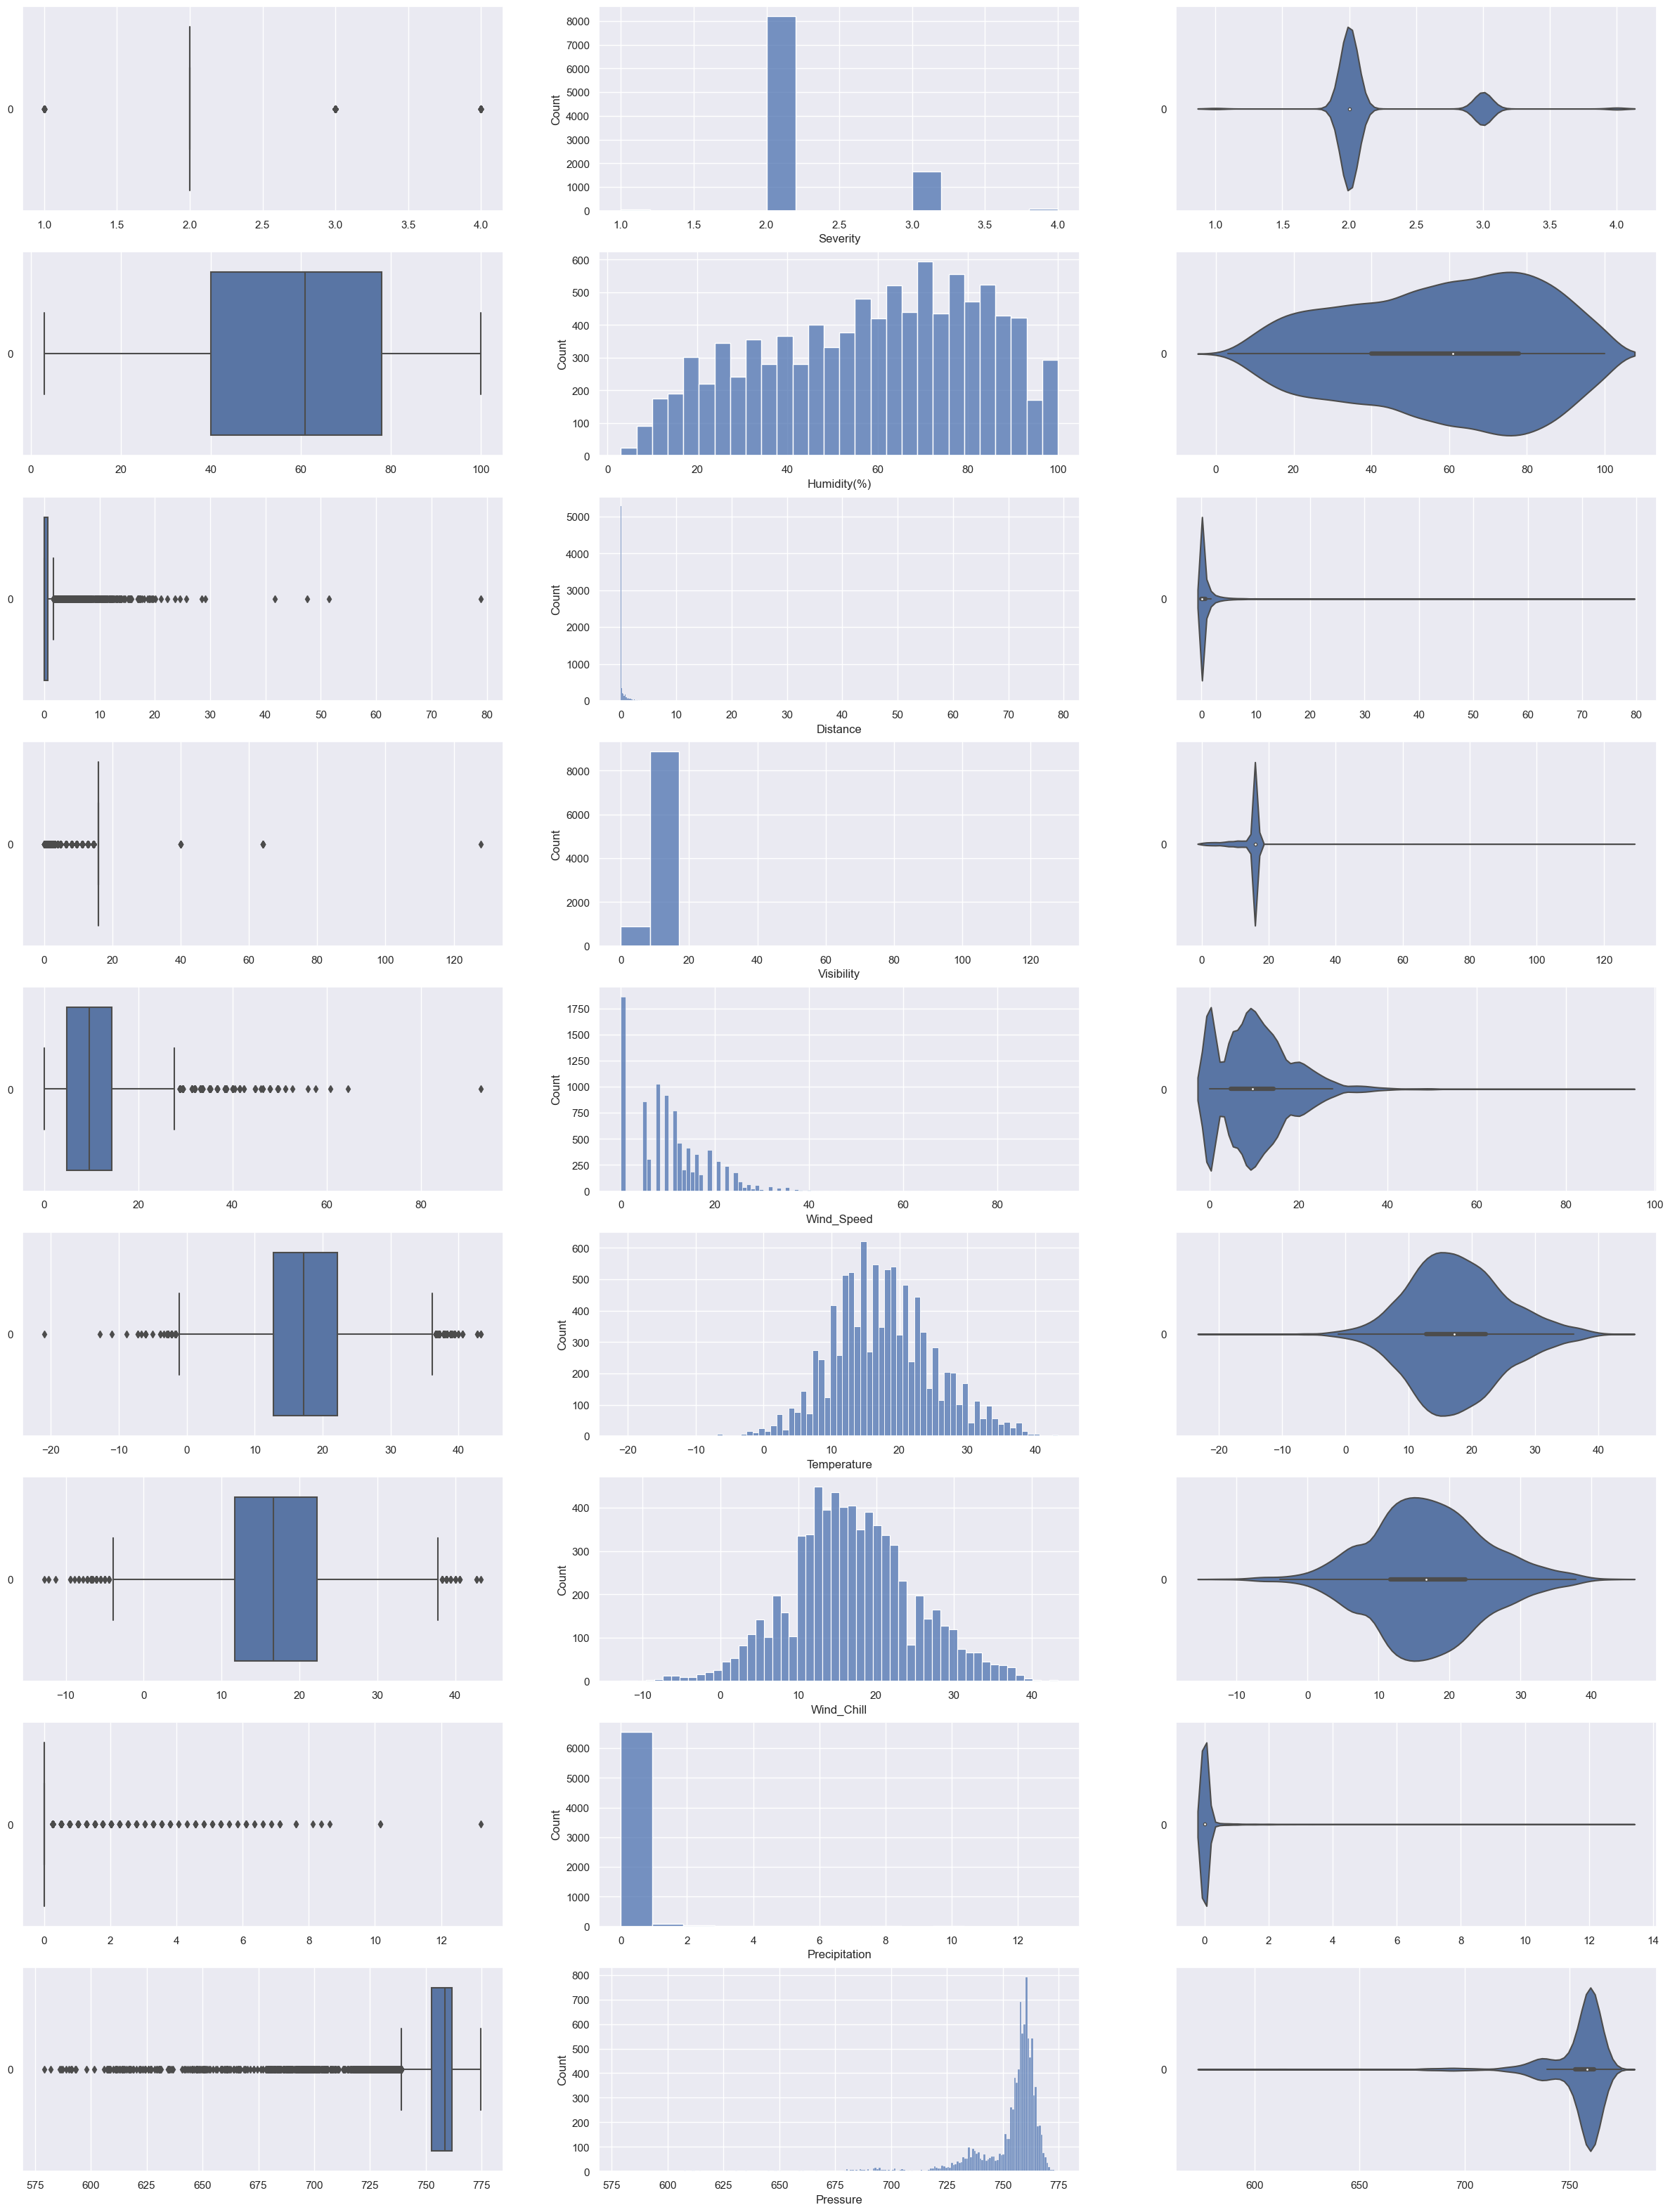

In [20]:
numeric_data = pd.DataFrame(cal_accident_df[["Severity", "Humidity(%)", "Distance", "Visibility", "Wind_Speed", "Temperature",
                                             "Wind_Chill", "Precipitation", "Pressure"]])

f, axes = plt.subplots(9, 3, figsize=(30, 40))

count = 0
for var in numeric_data:
    sb.boxplot(data = numeric_data[var], orient = "h", ax = axes[count,0])
    sb.histplot(data = numeric_data[var], ax = axes[count,1])
    sb.violinplot(data = numeric_data[var], orient = "h", ax = axes[count,2])
    count += 1



               Severity  Humidity(%)  Distance  Visibility  Wind_Speed  \
Severity       1.000000     0.017448 -0.093286   -0.005756    0.050246   
Humidity(%)    0.017448     1.000000 -0.014321   -0.353419   -0.227244   
Distance      -0.093286    -0.014321  1.000000   -0.014669   -0.011543   
Visibility    -0.005756    -0.353419 -0.014669    1.000000    0.086454   
Wind_Speed     0.050246    -0.227244 -0.011543    0.086454    1.000000   
Temperature    0.062288    -0.647464 -0.029727    0.216962    0.252012   
Wind_Chill     0.047878    -0.651284 -0.021241    0.220742    0.225297   
Precipitation  0.012412     0.200732 -0.000472   -0.313045    0.079113   
Pressure       0.105500     0.098245 -0.120072    0.062126   -0.014199   

               Temperature  Wind_Chill  Precipitation  Pressure  
Severity          0.062288    0.047878       0.012412  0.105500  
Humidity(%)      -0.647464   -0.651284       0.200732  0.098245  
Distance         -0.029727   -0.021241      -0.000472 -0.1200

<Axes: >

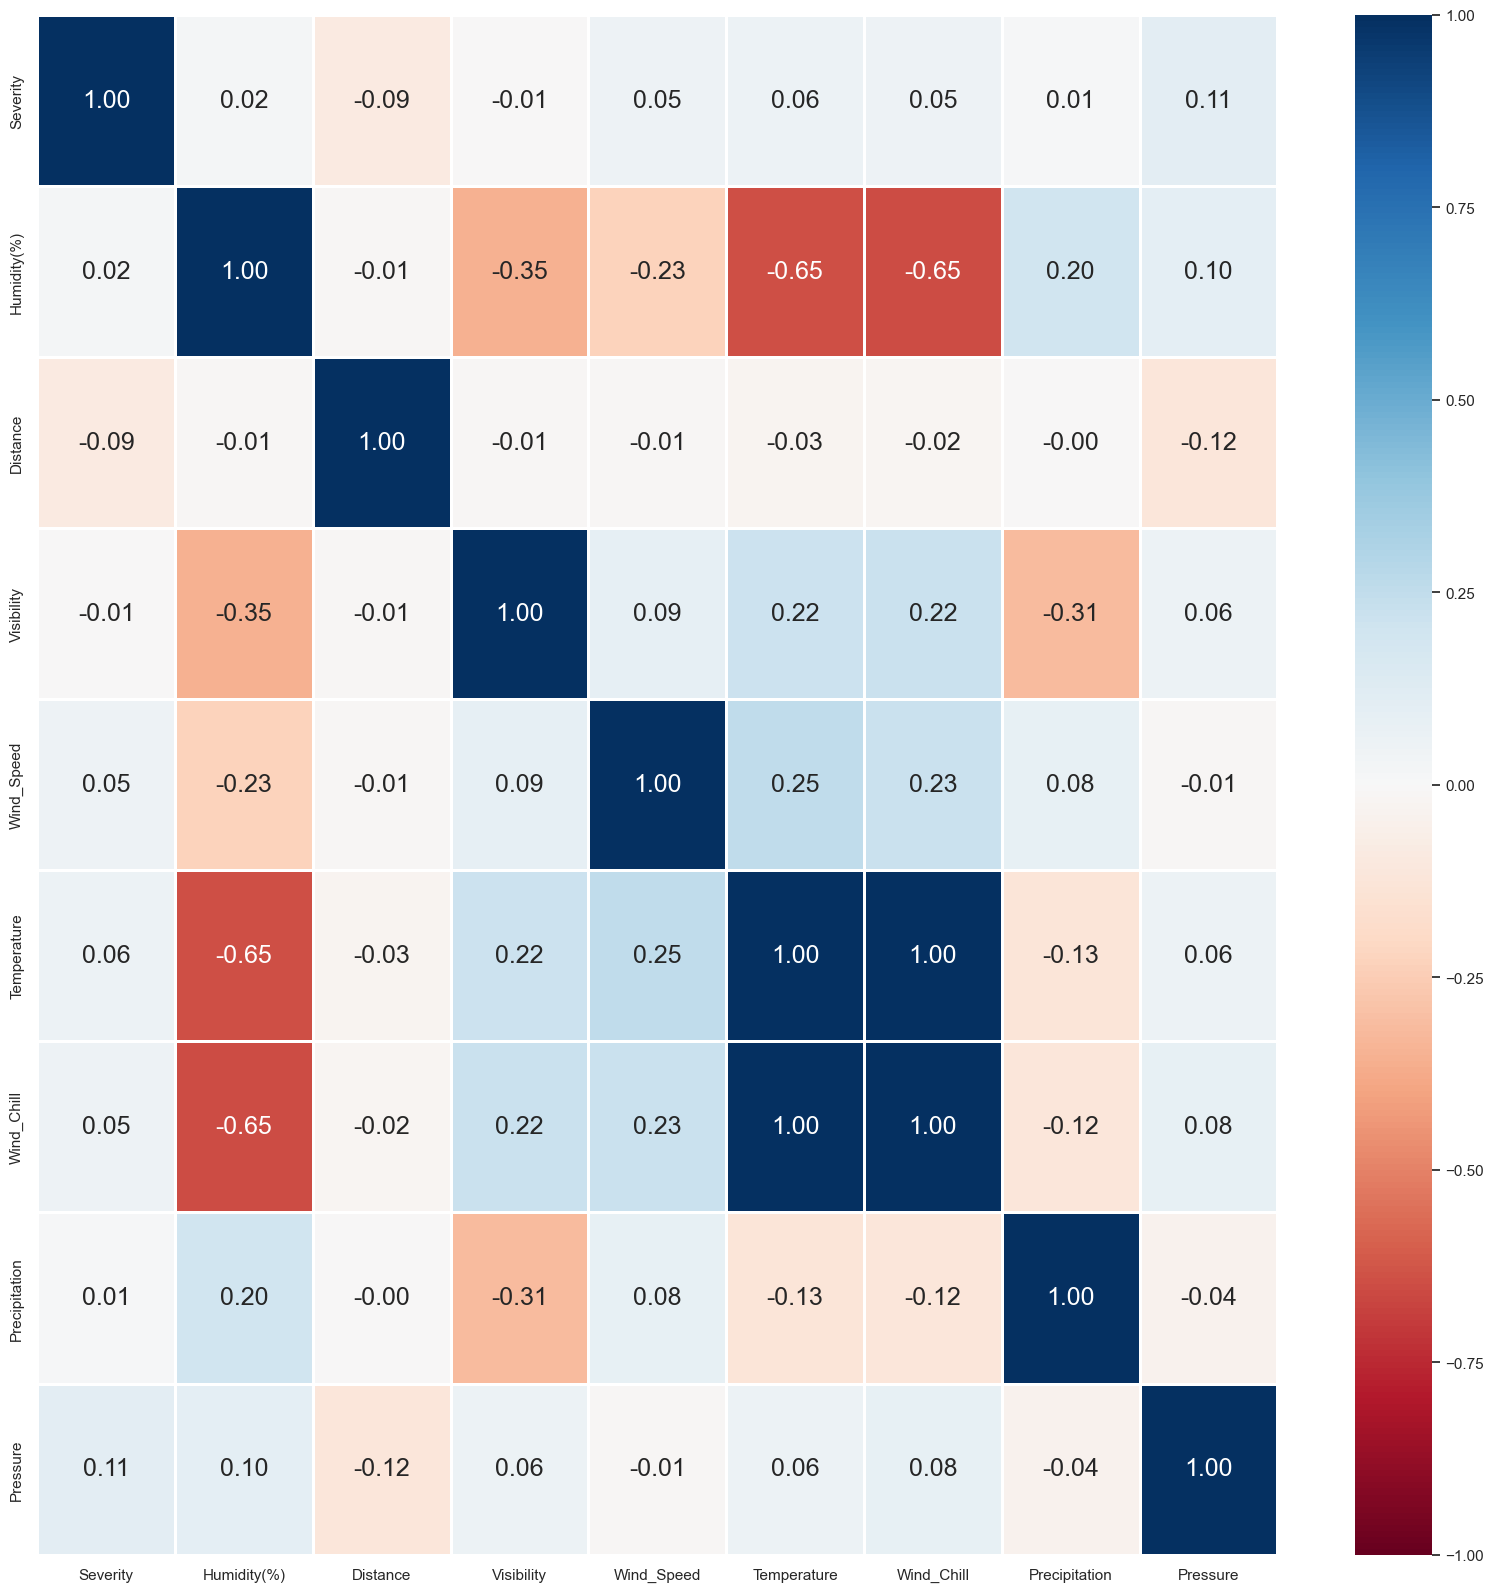

In [21]:
    # Correlation Matrix
    print(numeric_data.corr())

    # Heatmap of the Correlation Matrix
    f = plt.figure(figsize=(20, 20))
    sb.heatmap(numeric_data.corr(), vmin = -1, vmax = 1, linewidths = 1,
               annot = True, fmt = ".2f", annot_kws = {"size": 18}, cmap = "RdBu")

c:\Users\fazli\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


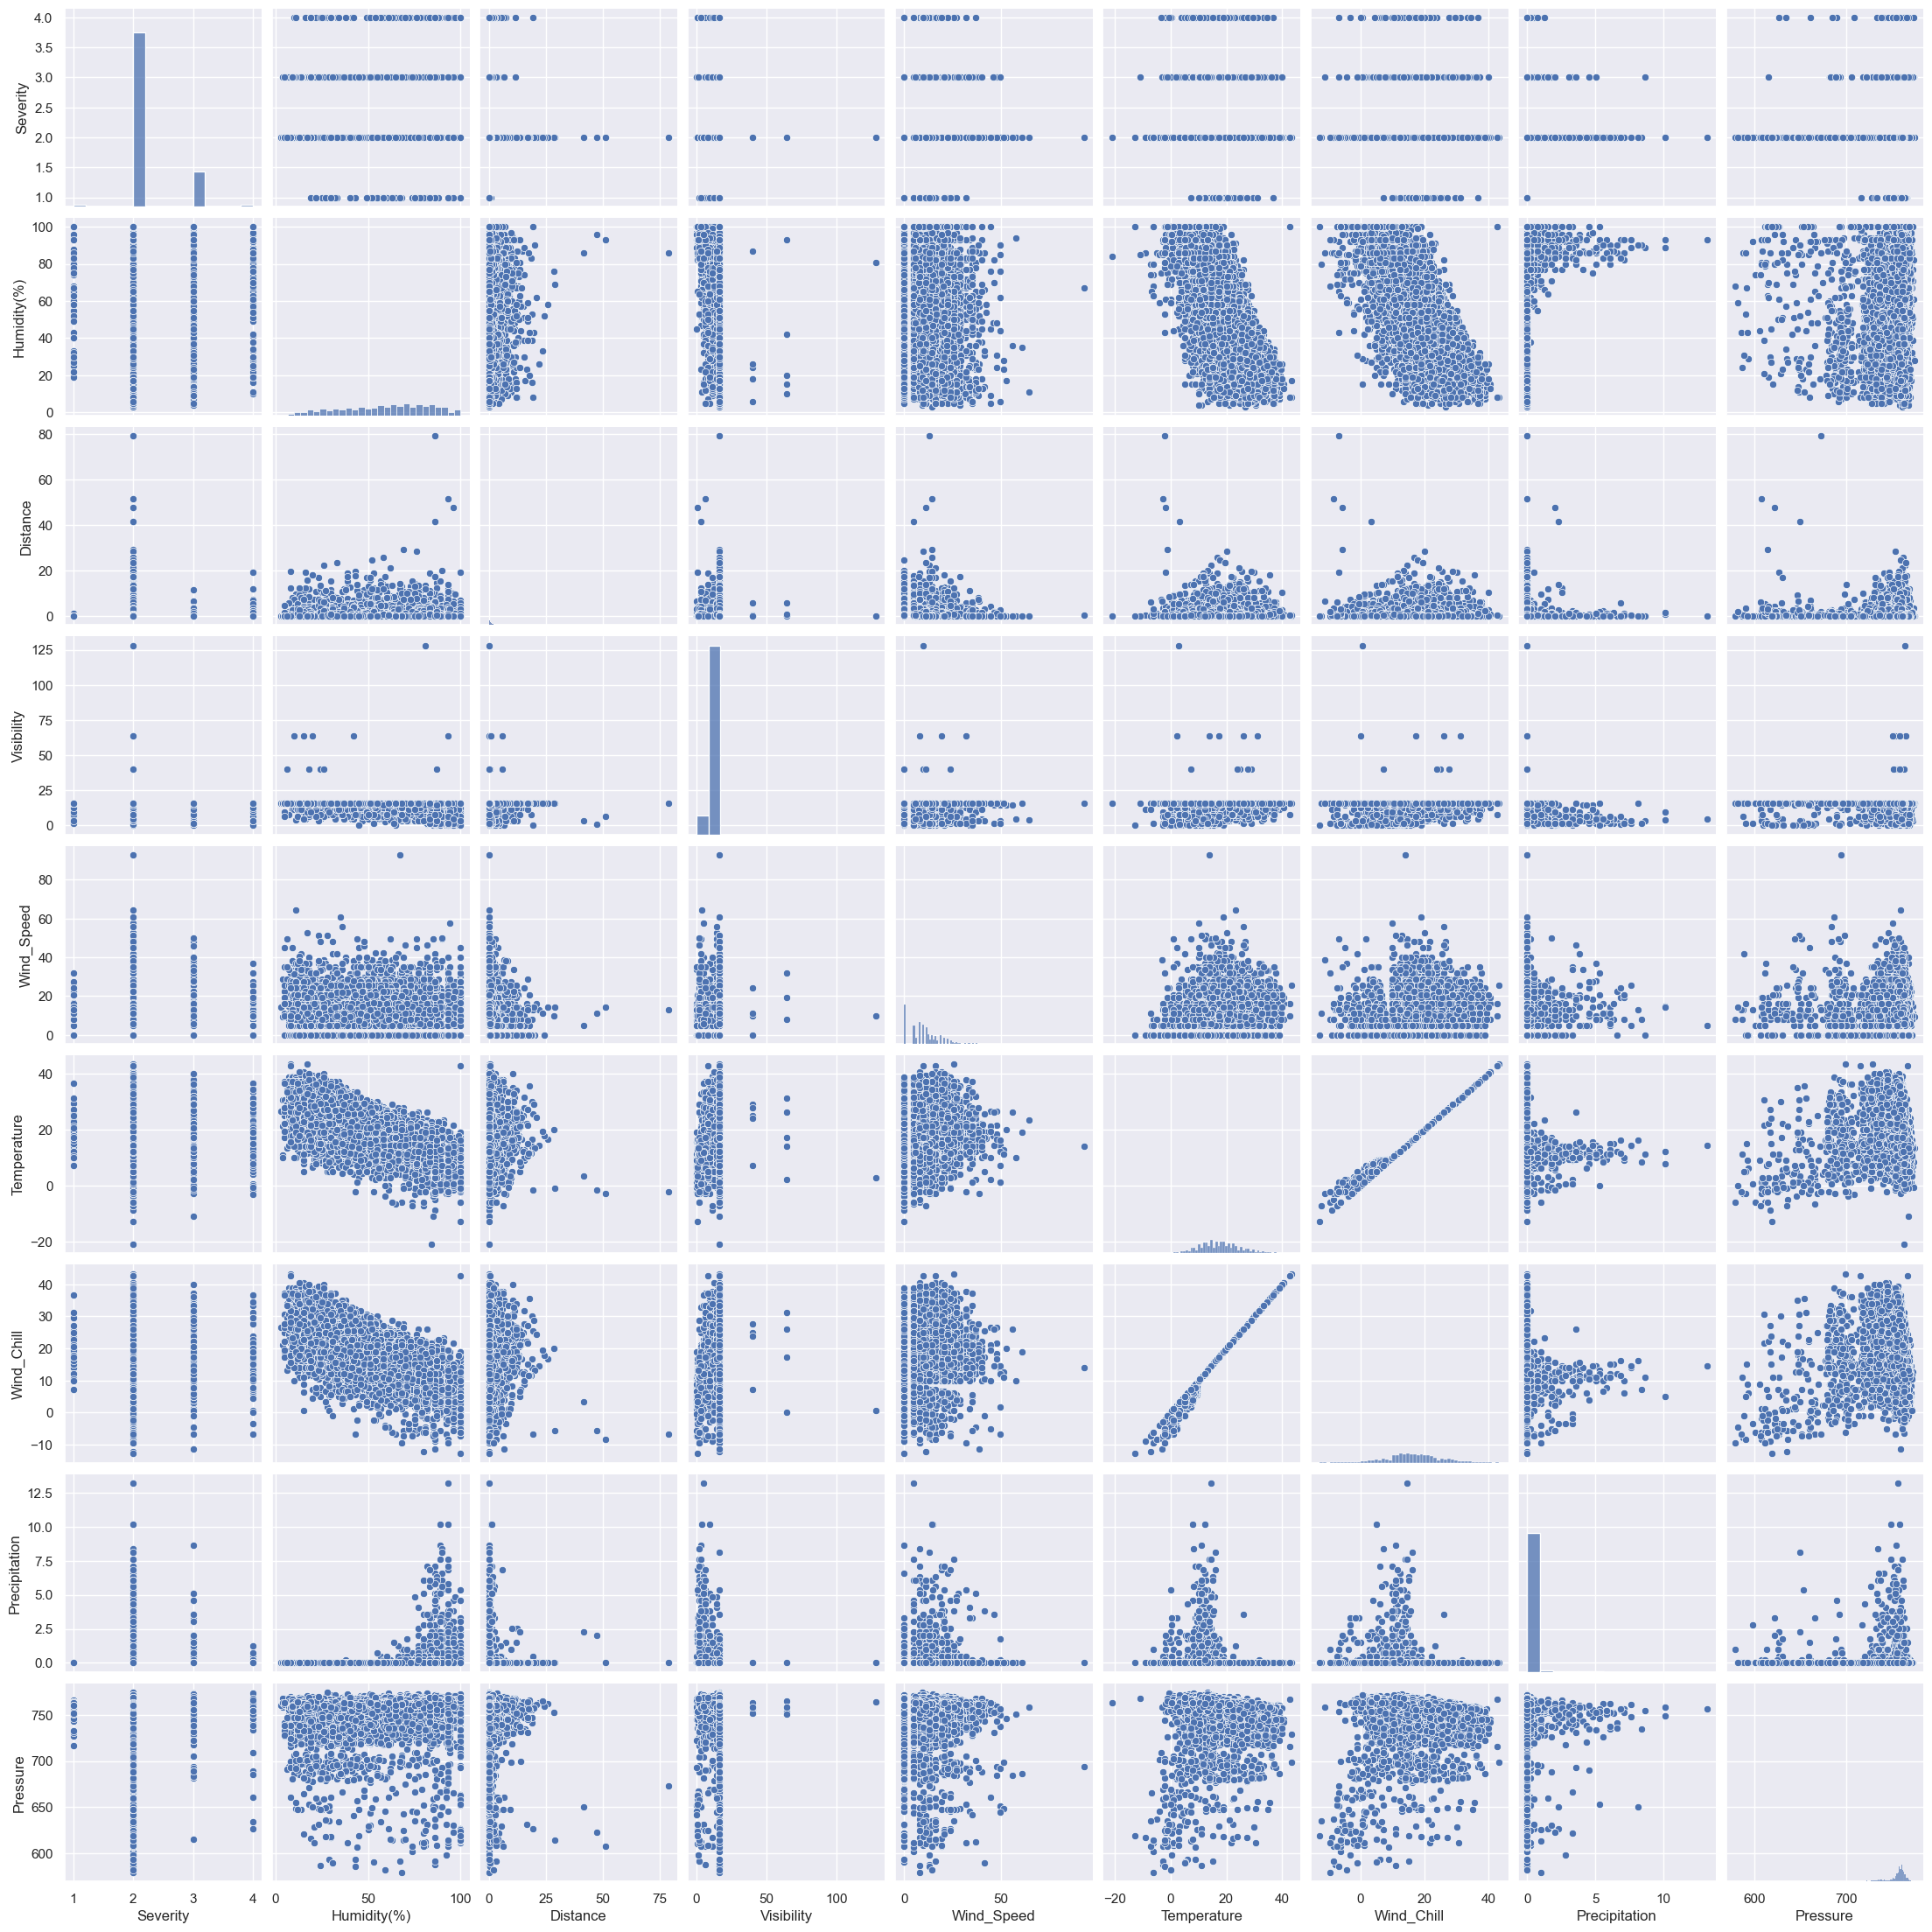

In [22]:
# Draw pairs of variables against one another
sb.pairplot(data = numeric_data)

In [23]:
severity_4_df = pd.DataFrame(cal_accident_df[cal_accident_df["Severity"] == 4])
severity_3_df = pd.DataFrame(cal_accident_df[cal_accident_df["Severity"] == 3])
severity_2_df = pd.DataFrame(cal_accident_df[cal_accident_df["Severity"] == 2])
severity_1_df = pd.DataFrame(cal_accident_df[cal_accident_df["Severity"] == 1])

In [24]:
severity_4_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 94 entries, 14 to 9893
Data columns (total 37 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             94 non-null     int64         
 1   Severity               94 non-null     int64         
 2   Start_Time             94 non-null     datetime64[ns]
 3   Start_Lat              94 non-null     float64       
 4   Start_Lng              94 non-null     float64       
 5   Street                 94 non-null     object        
 6   City                   94 non-null     object        
 7   County                 94 non-null     object        
 8   Zipcode                94 non-null     object        
 9   Humidity(%)            87 non-null     float64       
 10  Wind_Direction         88 non-null     object        
 11  Weather_Condition      89 non-null     object        
 12  Amenity                94 non-null     bool          
 13  Bump     

## Severity = 4

In [25]:
severity_4_df[["Humidity(%)", "Distance", "Visibility", "Wind_Speed", "Temperature",
                "Wind_Chill", "Precipitation", "Pressure"]].describe()

,Humidity(%),Distance,Visibility,Wind_Speed,Temperature,Wind_Chill,Precipitation,Pressure
count,87.000000,94.000000,89.000000,76.000000,87.000000,51.000000,53.000000,90.000000
mean,60.678161,1.239217,14.678652,10.061053,17.482759,17.331155,0.057509,751.904911
std,24.547768,2.609846,3.591609,8.331929,9.173665,10.768621,0.215074,24.788711
min,10.000000,0.000000,0.400000,0.000000,-3.333333,-6.666667,0.000000,626.872000
25%,45.500000,0.121200,16.000000,4.800000,11.694444,10.000000,0.000000,752.919500
50%,63.000000,0.365600,16.000000,8.640000,17.777778,17.222222,0.000000,758.190000
75%,80.000000,1.097600,16.000000,14.720000,22.888889,23.333333,0.000000,762.254000
max,100.000000,19.438400,16.000000,36.800000,36.666667,36.666667,1.270000,773.430000


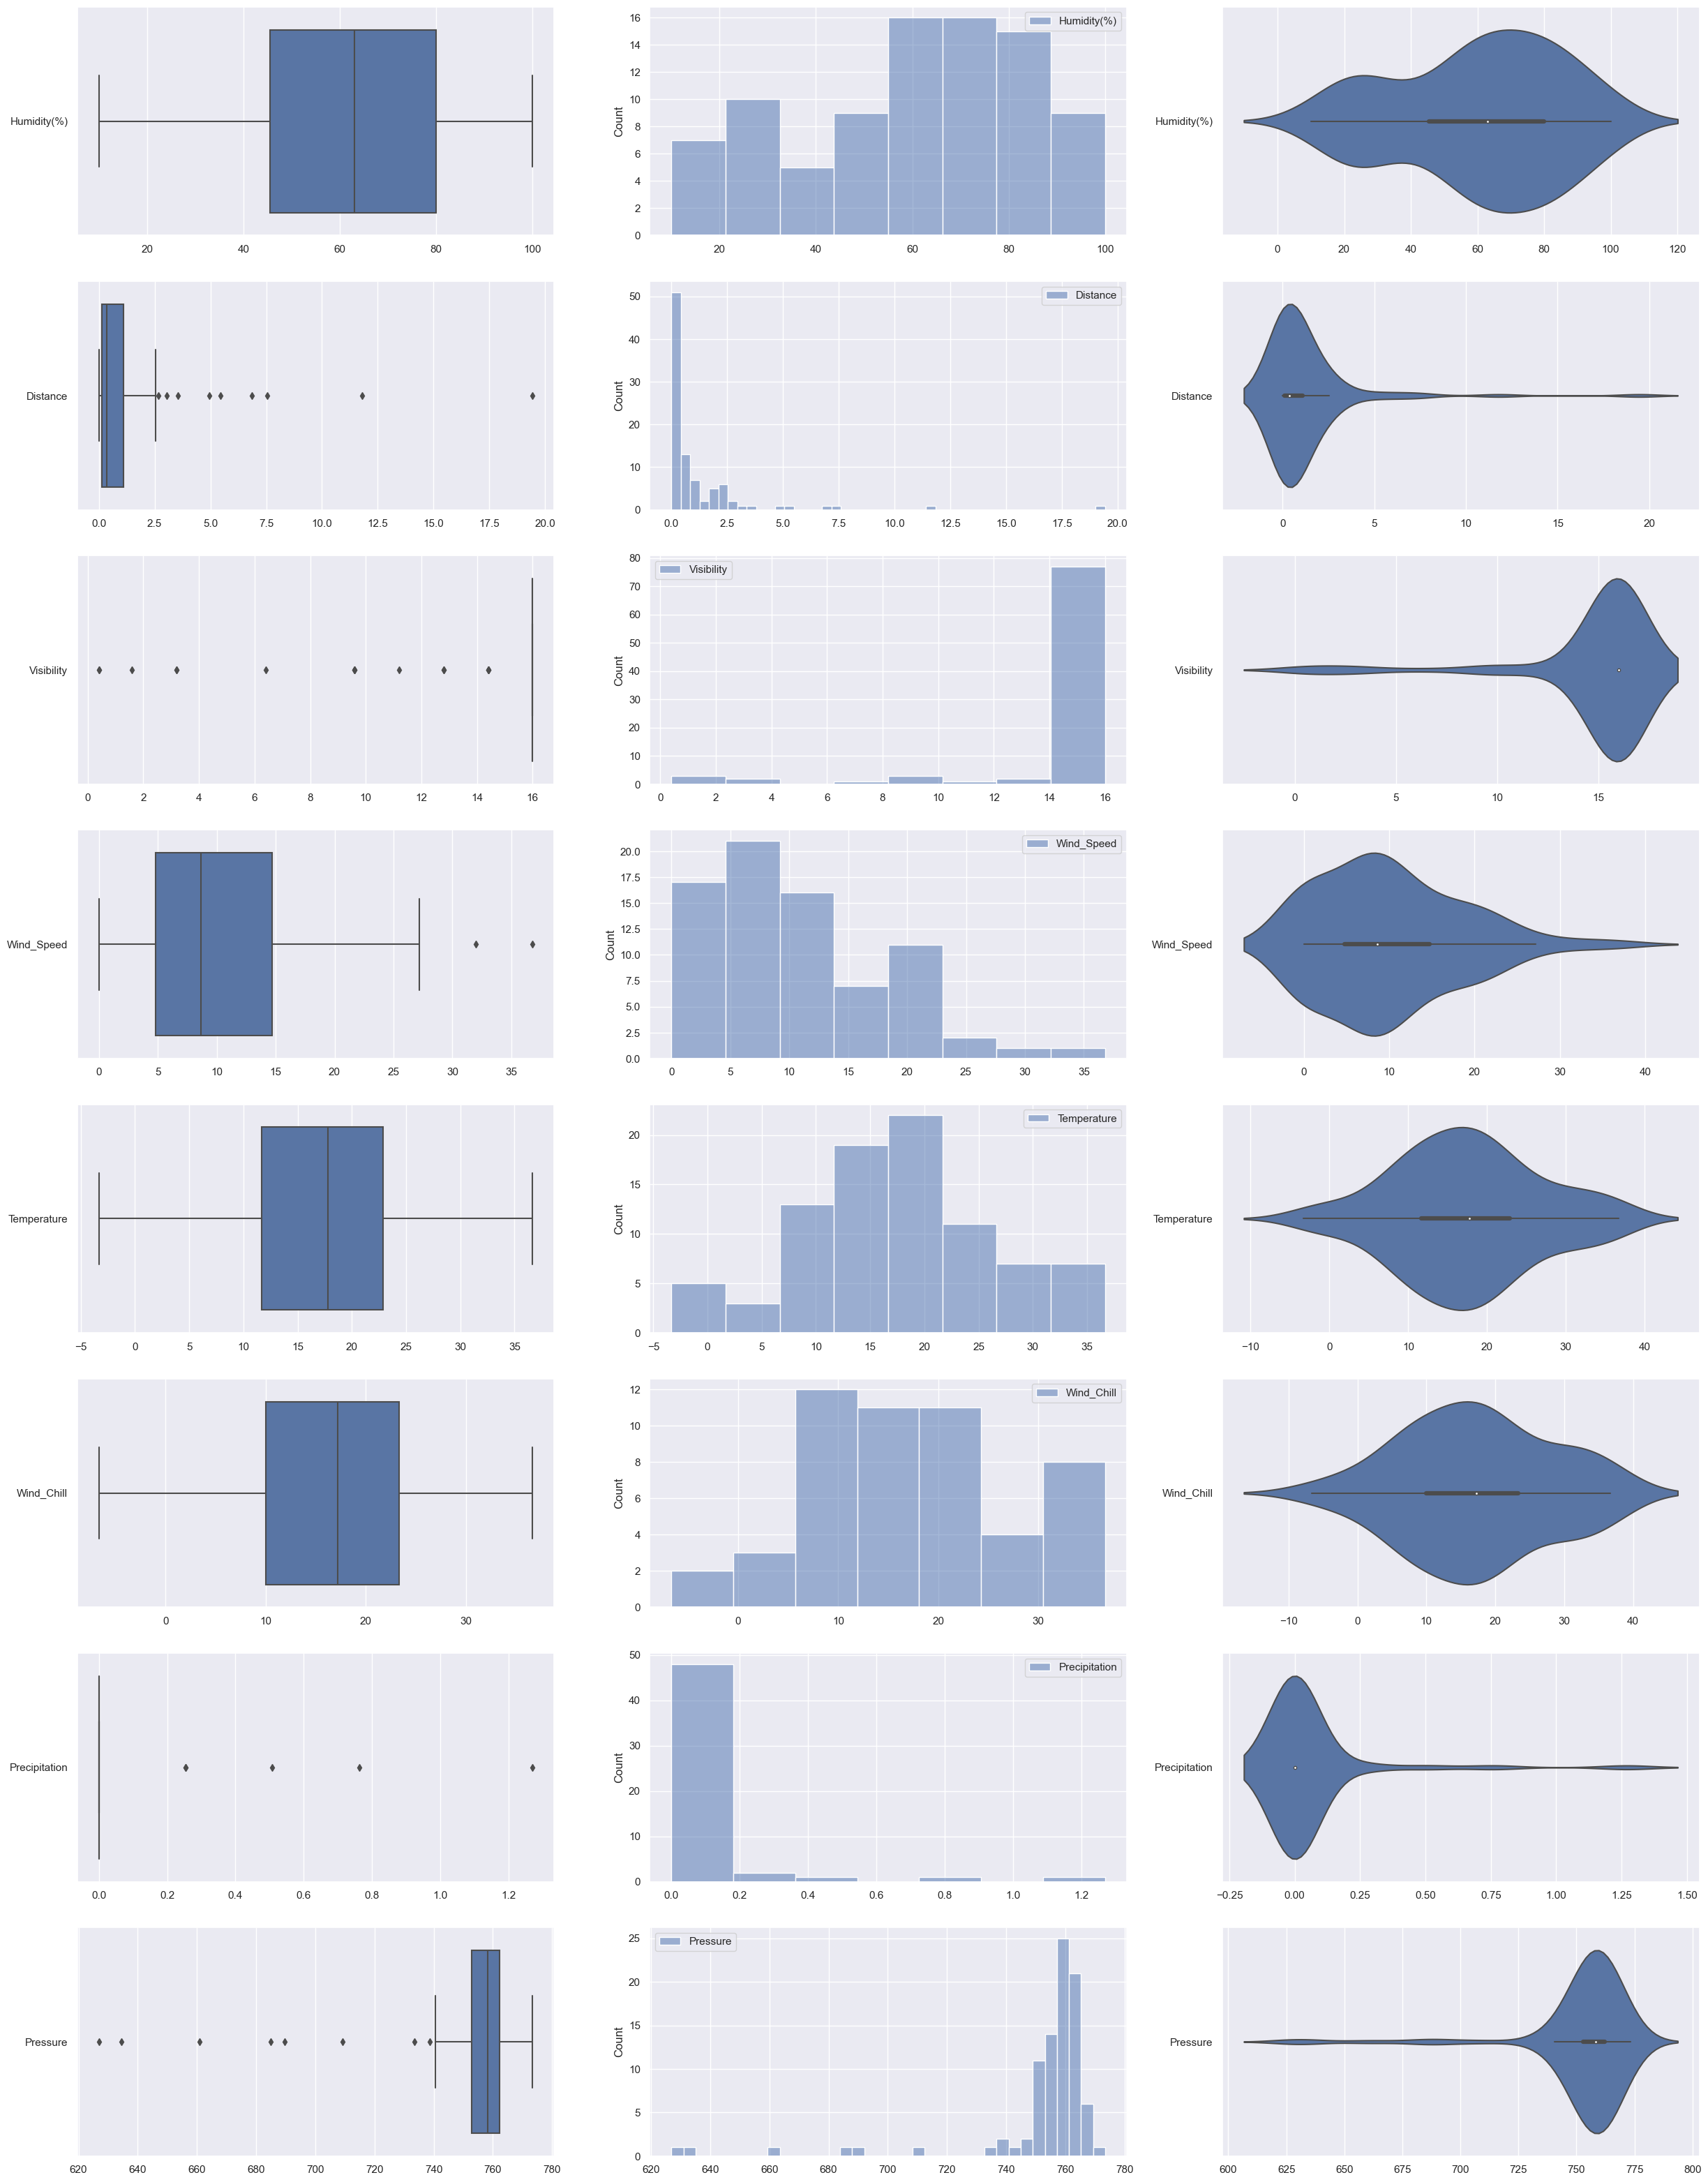

In [26]:
numeric_value = ["Humidity(%)", "Distance", "Visibility", "Wind_Speed", "Temperature",
                "Wind_Chill", "Precipitation", "Pressure"]

f, axes = plt.subplots(8, 3, figsize=(30, 40))

count = 0
for var in numeric_value:
    temp_db = pd.DataFrame(severity_4_df[var])
    sb.boxplot(data = temp_db, orient = "h", ax = axes[count, 0])
    sb.histplot(data = temp_db, ax = axes[count,1])
    sb.violinplot(data = temp_db, orient = "h", ax = axes[count,2])
    count += 1



## Severity = 3

In [27]:
severity_3_df[["Humidity(%)", "Distance", "Visibility", "Wind_Speed", "Temperature",
                "Wind_Chill", "Precipitation", "Pressure"]].describe()

,Humidity(%),Distance,Visibility,Wind_Speed,Temperature,Wind_Chill,Precipitation,Pressure
count,1600.000000,1643.000000,1607.000000,1346.000000,1600.000000,593.000000,599.000000,1609.00000
mean,59.703125,0.162201,14.471388,11.553165,18.839167,18.521454,0.133149,758.10065
std,23.244062,0.616182,3.335707,7.523707,6.440705,7.156226,0.624196,10.31907
min,4.000000,0.000000,0.000000,0.000000,-11.000000,-11.277778,0.000000,615.18800
25%,42.000000,0.000000,16.000000,7.360000,14.388889,13.888889,0.000000,757.68200
50%,63.000000,0.000000,16.000000,11.040000,18.333333,18.333333,0.000000,760.22200
75%,78.000000,0.016000,16.000000,16.000000,22.777778,22.777778,0.000000,762.76200
max,100.000000,11.744000,16.000000,49.760000,40.000000,40.000000,8.636000,773.68400


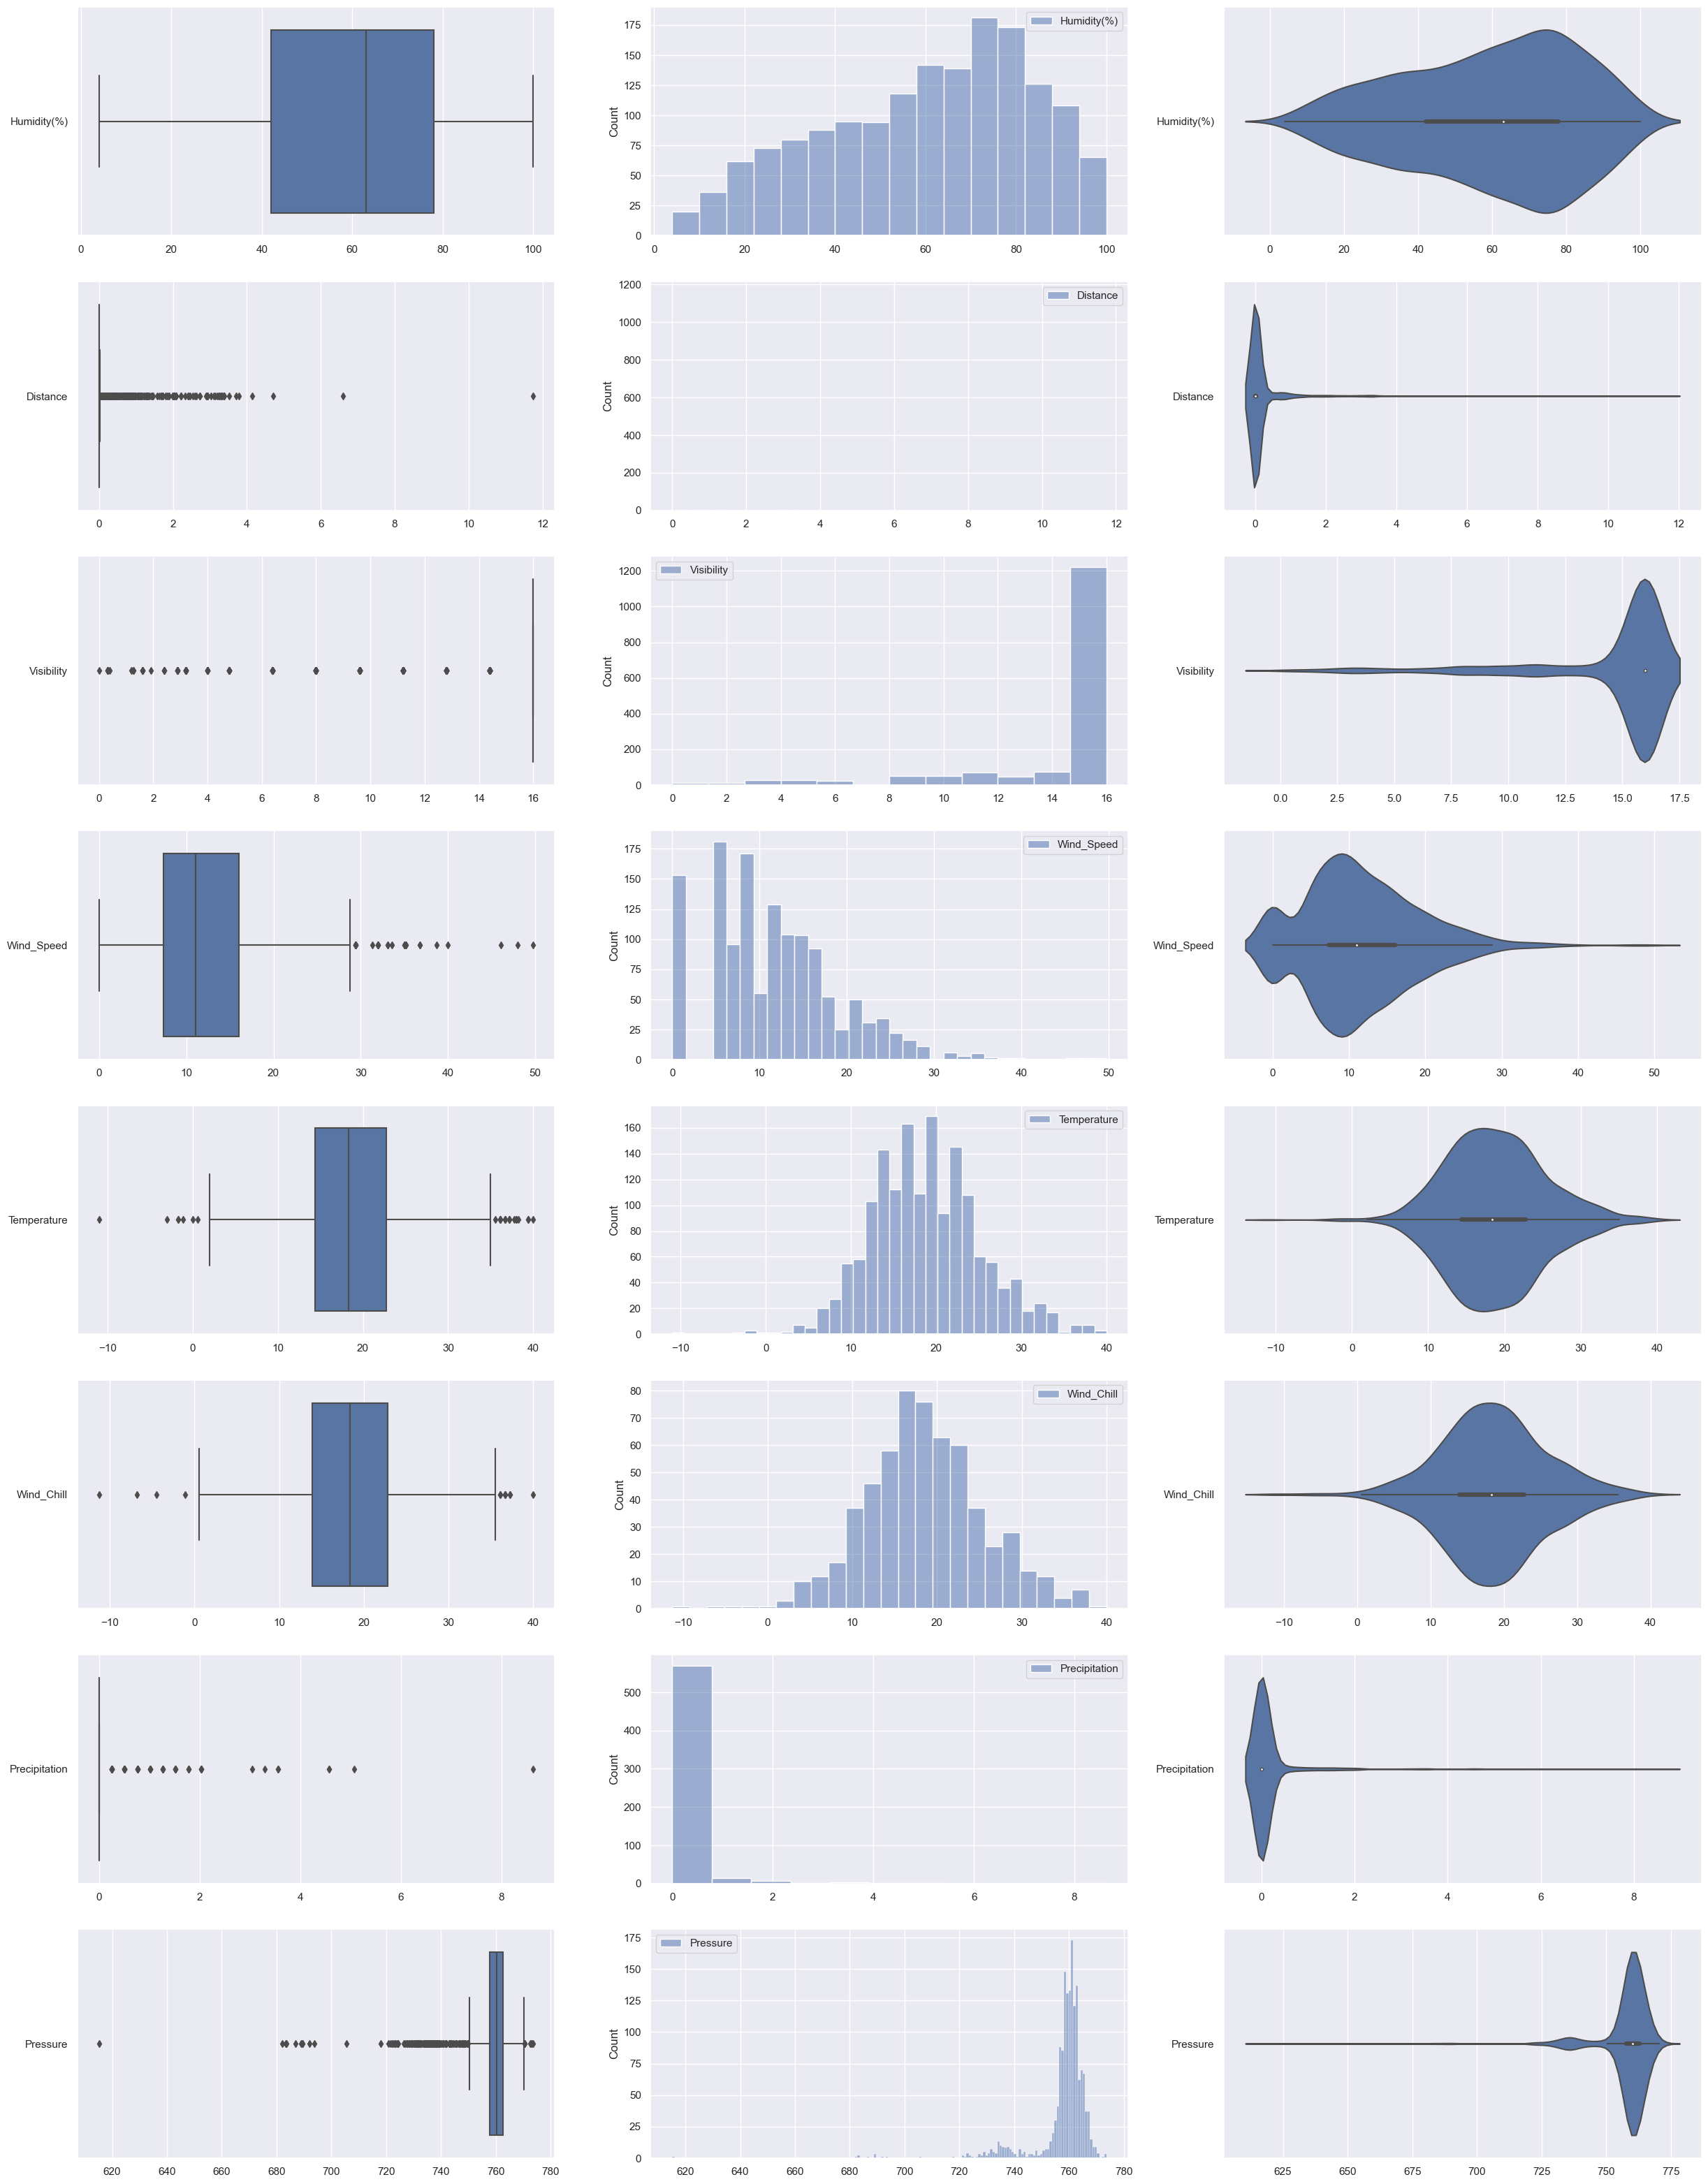

In [28]:
f, axes = plt.subplots(8, 3, figsize=(30, 40))

count = 0
for var in numeric_value:
    temp_db = pd.DataFrame(severity_3_df[var])
    sb.boxplot(data = temp_db, orient = "h", ax = axes[count, 0])
    sb.histplot(data = temp_db, ax = axes[count,1])
    sb.violinplot(data = temp_db, orient = "h", ax = axes[count,2])
    count += 1



## Severity = 2

In [29]:
severity_2_df[["Humidity(%)", "Distance", "Visibility", "Wind_Speed", "Temperature",
                "Wind_Chill", "Precipitation", "Pressure"]].describe()

,Humidity(%),Distance,Visibility,Wind_Speed,Temperature,Wind_Chill,Precipitation,Pressure
count,8002.000000,8206.000000,8032.000000,7625.000000,8018.000000,6376.000000,6056.000000,8047.000000
mean,58.459510,0.888881,14.543801,10.191423,17.365268,16.783572,0.101122,751.511445
std,24.321929,2.384041,3.975636,8.420855,7.631491,8.041581,0.632523,20.955729
min,3.000000,0.000000,0.000000,0.000000,-21.000000,-12.777778,0.000000,579.120000
25%,39.000000,0.000000,16.000000,4.800000,12.222222,11.666667,0.000000,751.078000
50%,61.000000,0.105600,16.000000,9.600000,16.722222,16.666667,0.000000,758.190000
75%,78.000000,0.819200,16.000000,14.400000,22.222222,21.666667,0.000000,761.492000
max,100.000000,78.953600,128.000000,92.800000,43.333333,43.333333,13.208000,774.700000


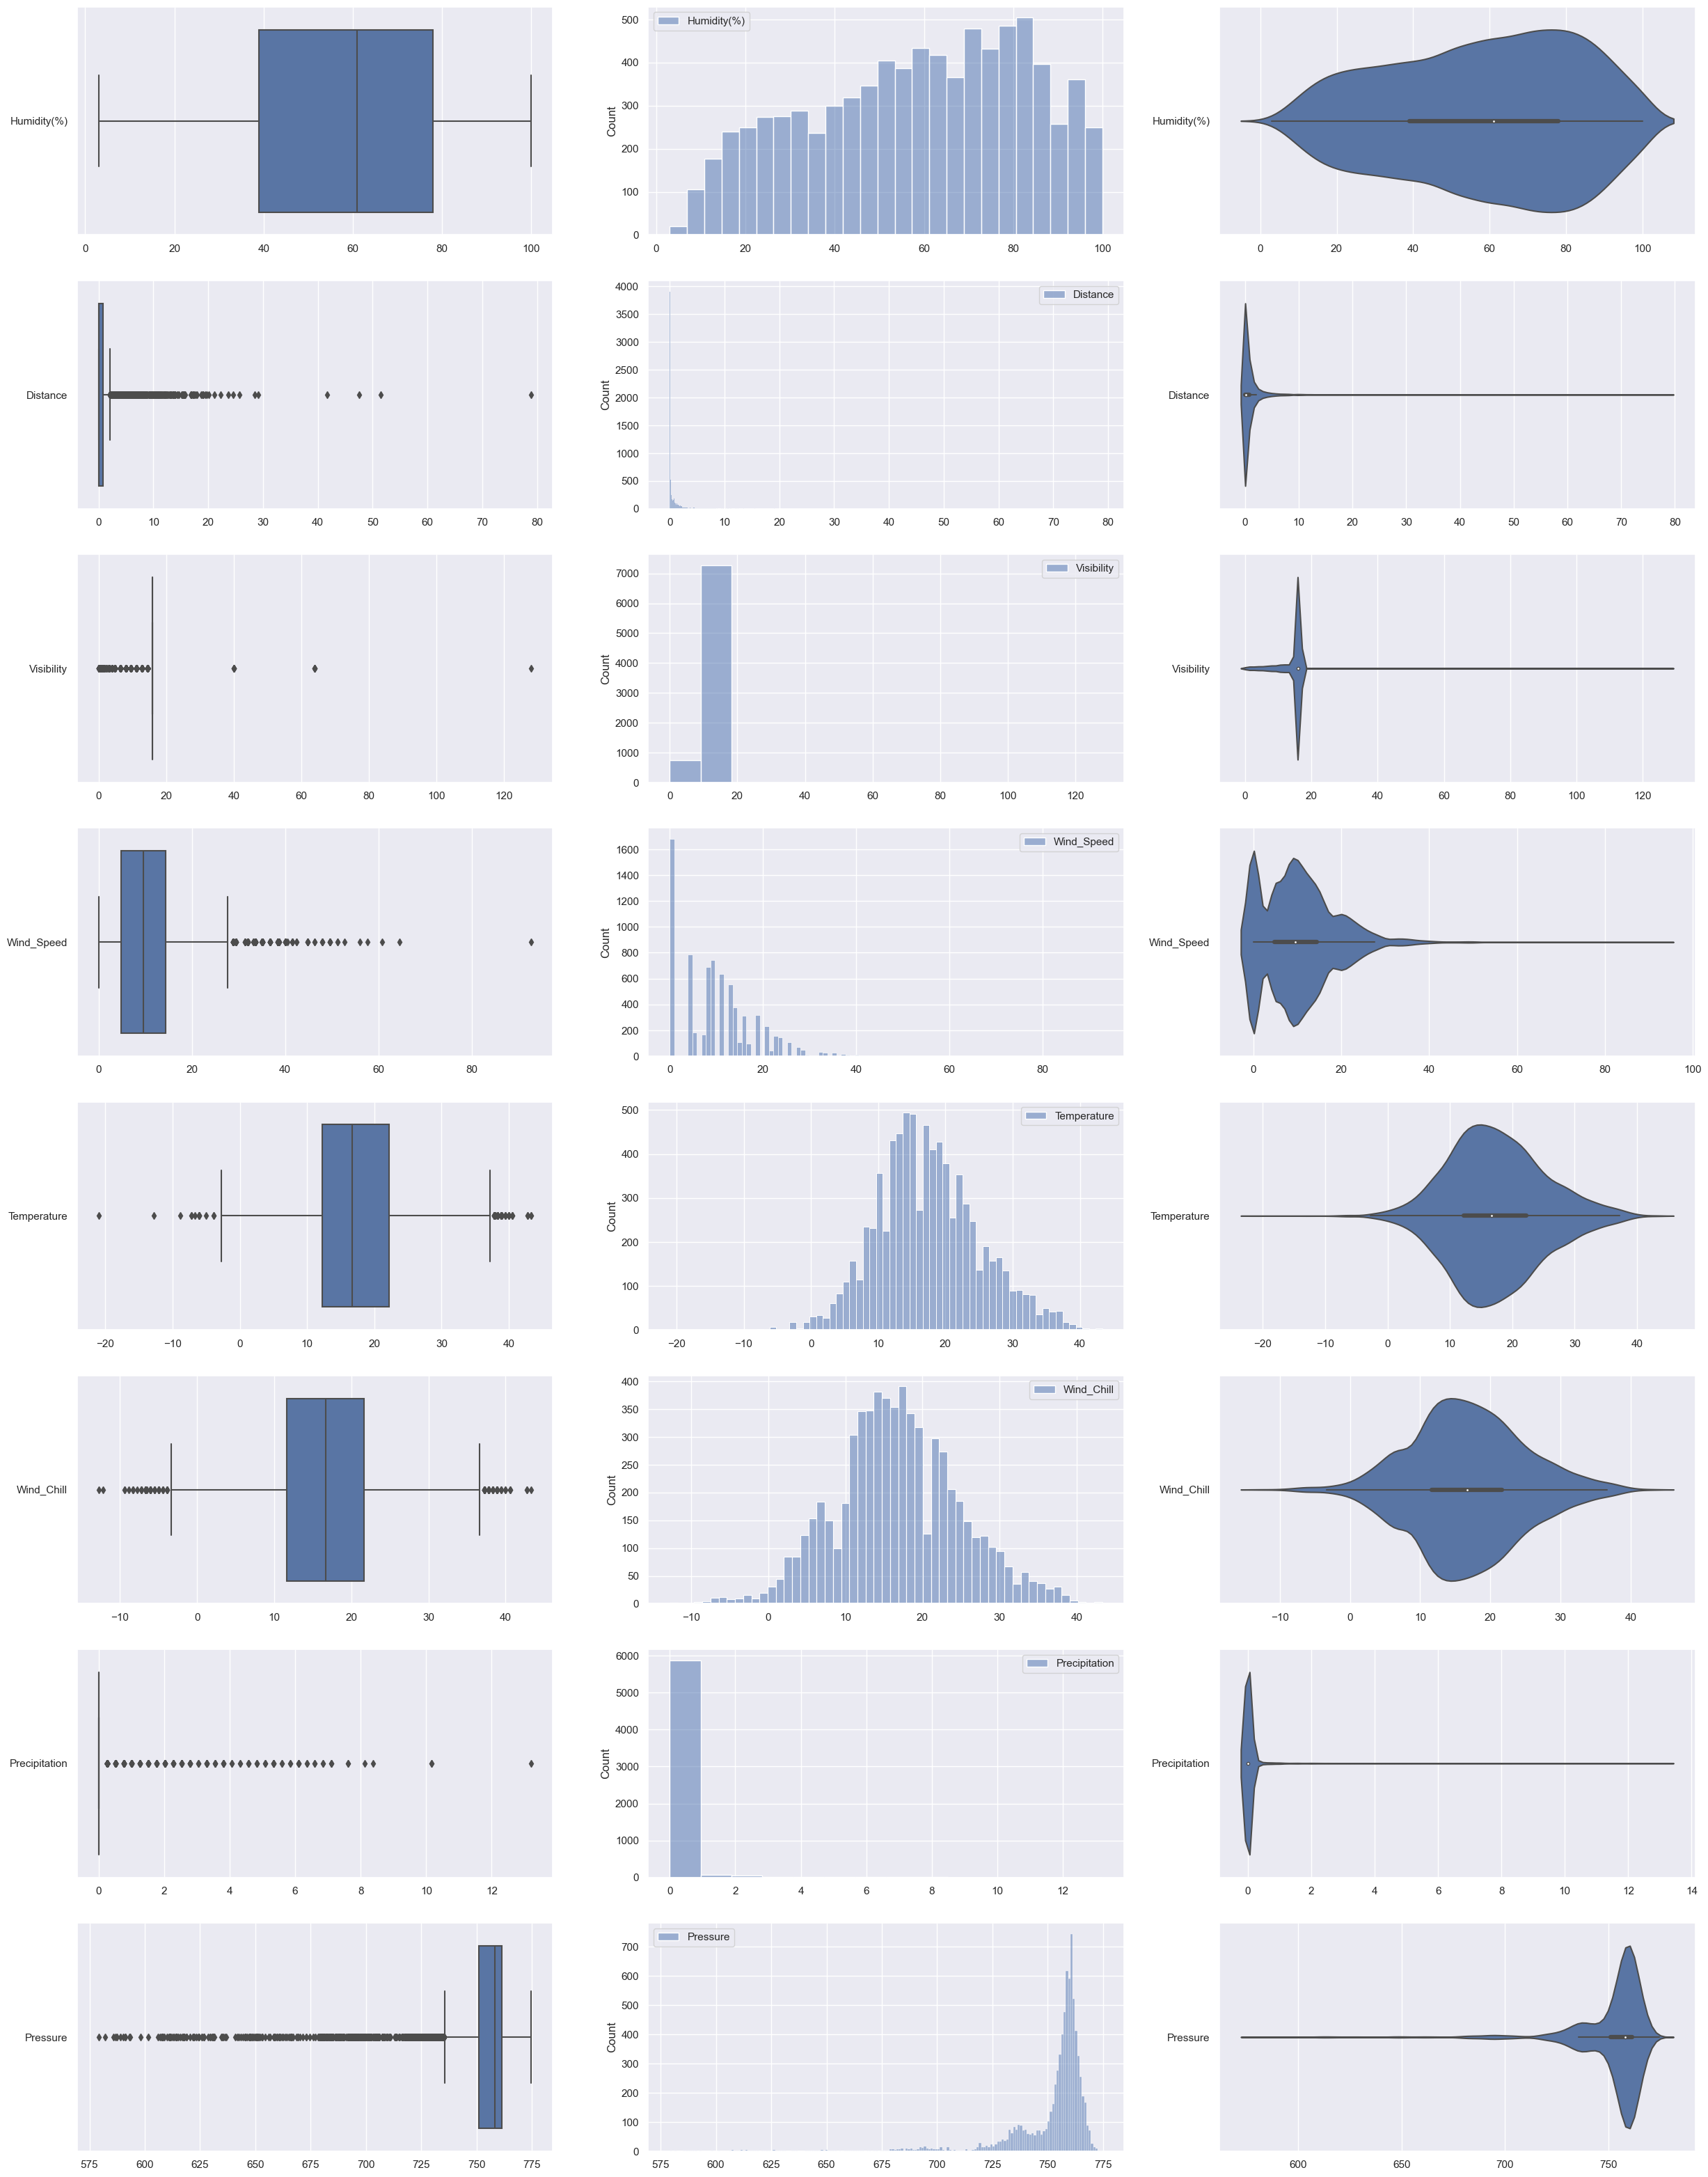

In [30]:
f, axes = plt.subplots(8, 3, figsize=(30, 40))

count = 0
for var in numeric_value:
    temp_db = pd.DataFrame(severity_2_df[var])
    sb.boxplot(data = temp_db, orient = "h", ax = axes[count, 0])
    sb.histplot(data = temp_db, ax = axes[count,1])
    sb.violinplot(data = temp_db, orient = "h", ax = axes[count,2])
    count += 1

## Severity = 1

In [31]:
severity_1_df[["Humidity(%)", "Distance", "Visibility", "Wind_Speed", "Temperature",
                "Wind_Chill", "Precipitation", "Pressure"]].describe()

,Humidity(%),Distance,Visibility,Wind_Speed,Temperature,Wind_Chill,Precipitation,Pressure
count,54.000000,57.000000,54.000000,54.000000,54.000000,52.000000,46.0,54.000000
mean,62.814815,0.018246,14.814815,10.103704,18.386831,18.279915,0.0,755.363074
std,23.241208,0.135611,3.141890,8.697081,6.446631,6.488412,0.0,9.965487
min,19.000000,0.000000,1.600000,0.000000,7.222222,7.222222,0.0,716.788000
25%,49.000000,0.000000,16.000000,0.000000,14.027778,13.888889,0.0,754.443500
50%,63.500000,0.000000,16.000000,9.600000,17.777778,17.777778,0.0,757.555000
75%,79.500000,0.000000,16.000000,14.400000,21.944444,21.388889,0.0,761.238000
max,100.000000,1.024000,16.000000,32.000000,36.666667,36.666667,0.0,765.810000


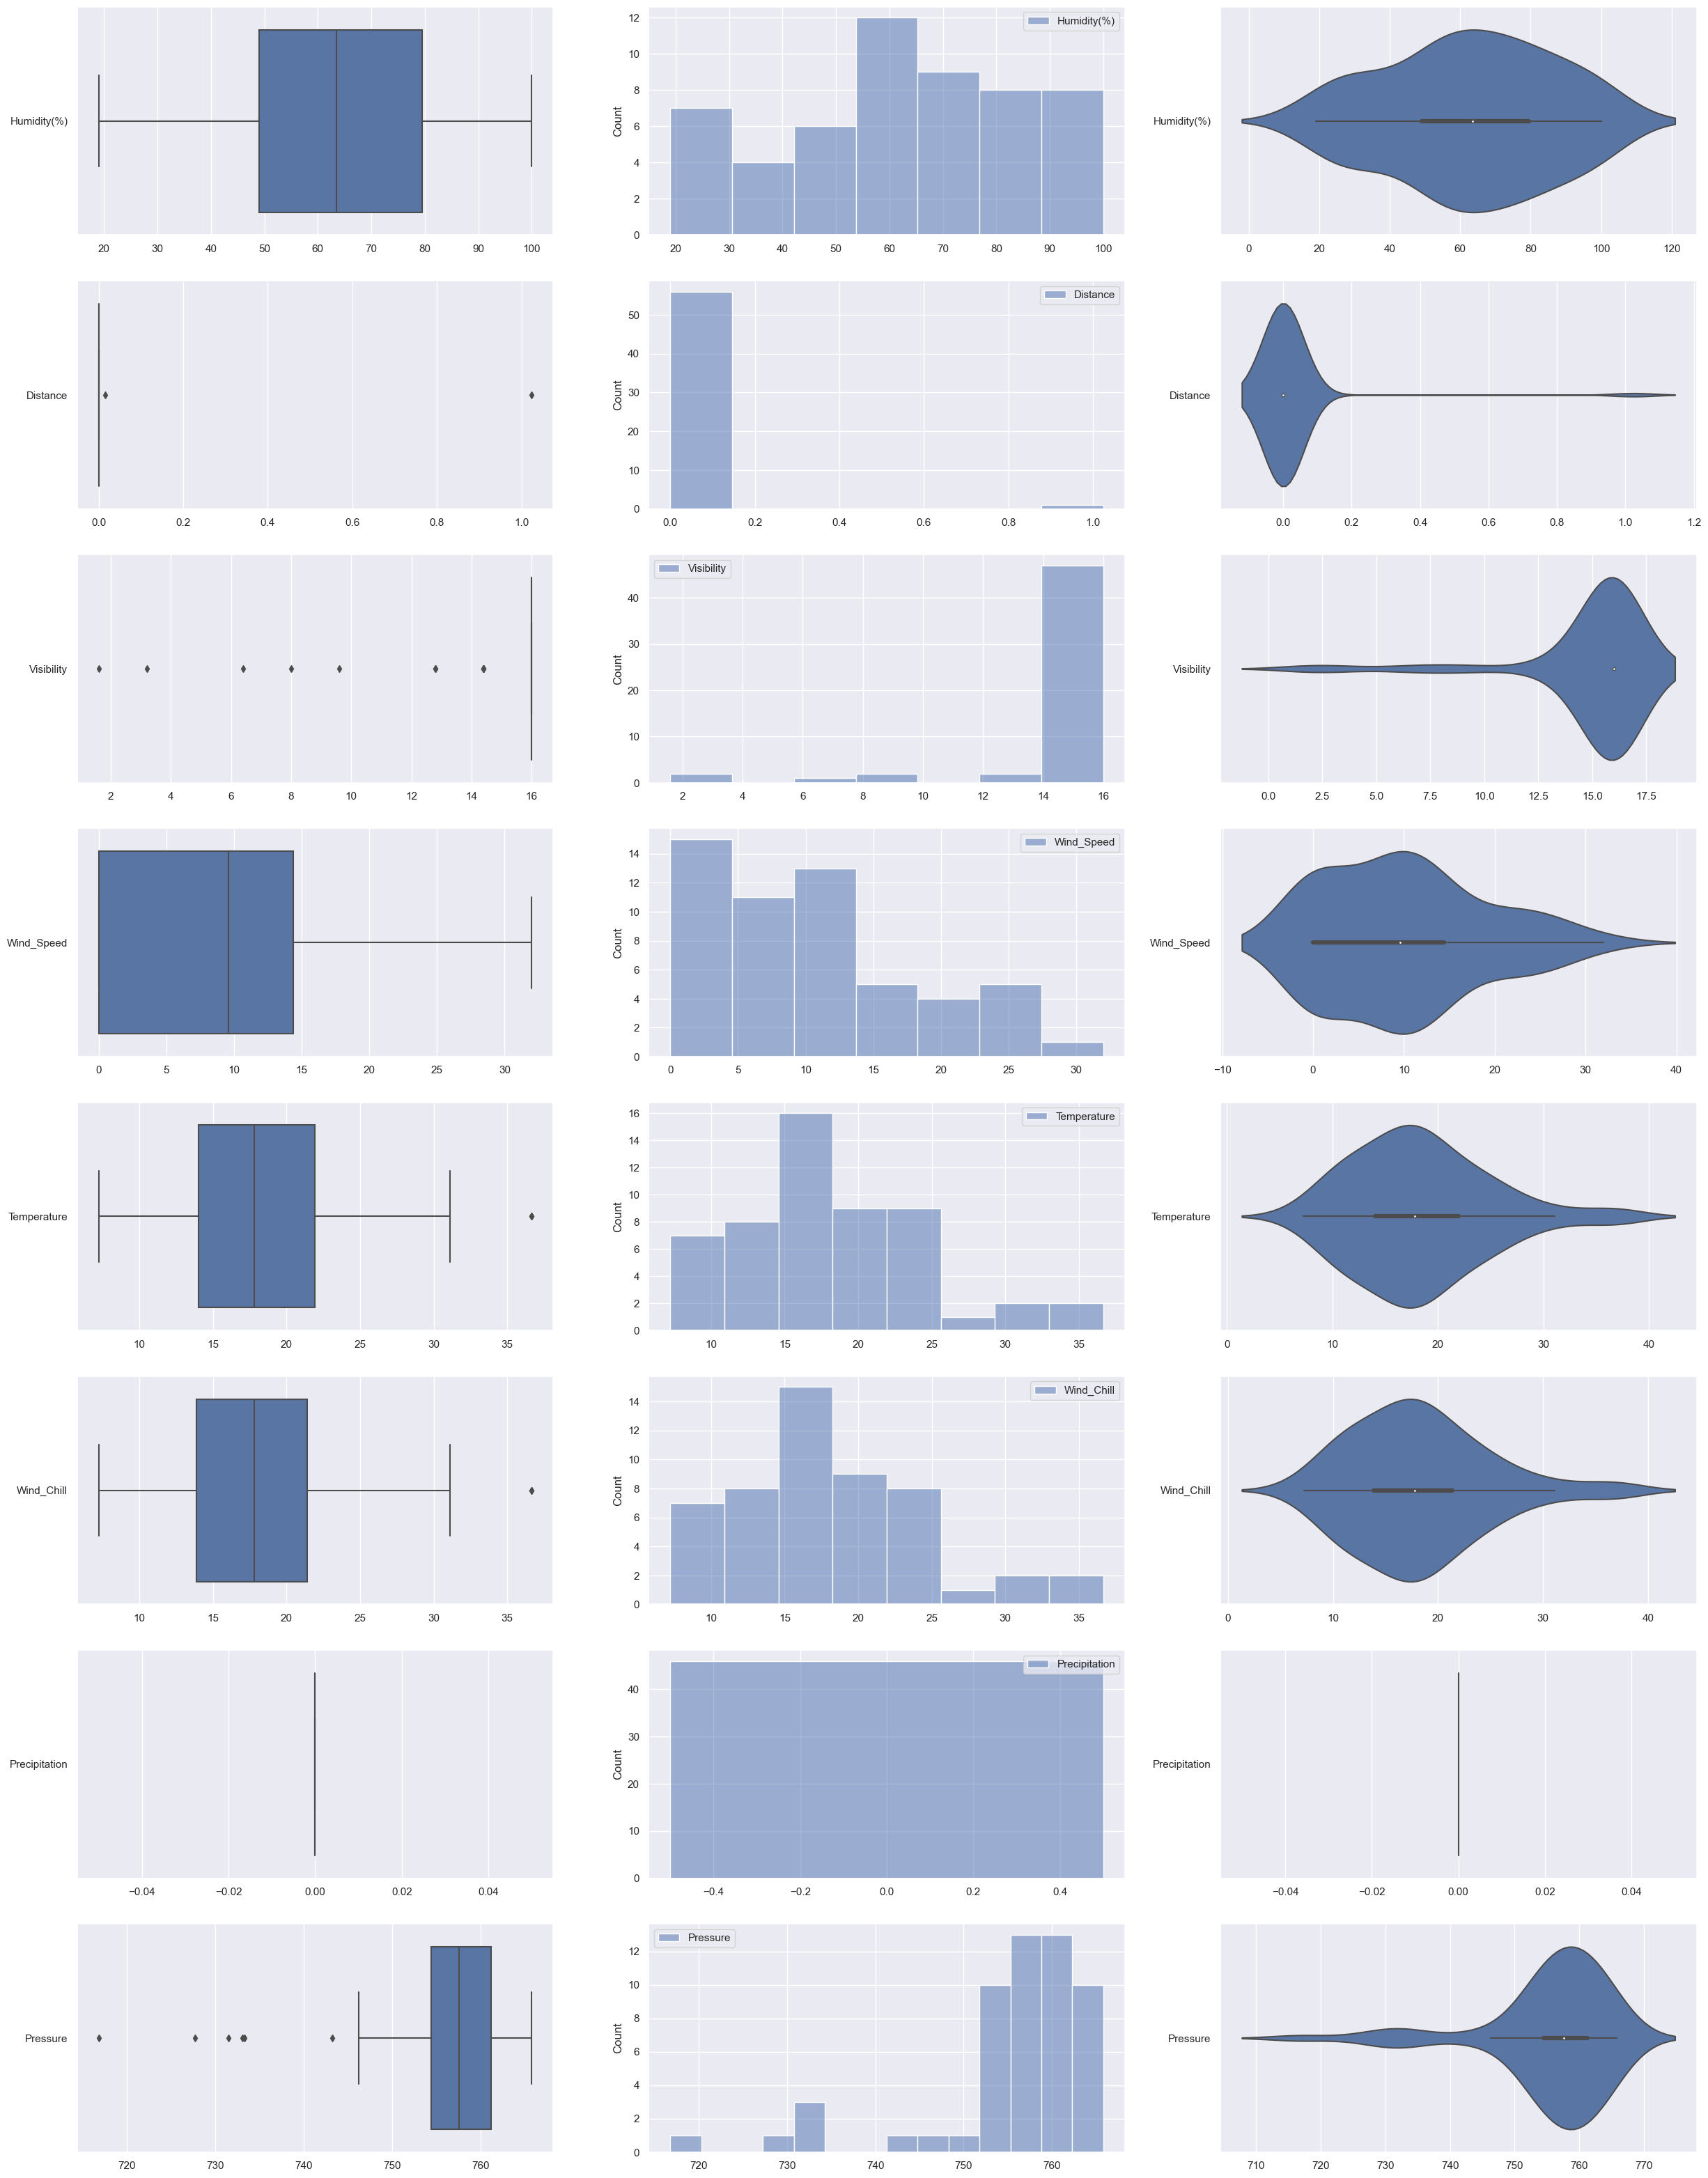

In [32]:
f, axes = plt.subplots(8, 3, figsize=(30, 40))

count = 0
for var in numeric_value:
    temp_db = pd.DataFrame(severity_1_df[var])
    sb.boxplot(data = temp_db, orient = "h", ax = axes[count, 0])
    sb.histplot(data = temp_db, ax = axes[count,1])
    sb.violinplot(data = temp_db, orient = "h", ax = axes[count,2])
    count += 1

From the analysis of how variables - 
`Humidity(%)`, `Distance`, `Visibility`, `Wind_Speed`, `Temperature`, `Wind_Chill`, `Precipitation`, `Pressure` 

we can see that most accidents occur in normal weather condition. This shows that drivers may be driving less carefully in good weather conditions as compared to poor weather conditions. This may be due to complacency of drivers when driving in good weather where there are not focusing as much. 